In [1]:
# import libraries
import pandas as pd
import scipy.stats
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# disable warnings, use w caution
import warnings
warnings.filterwarnings('ignore')

# project specific libs
import os
import matplotlib.pyplot as plt
import pathlib

In [2]:
# set project path
path = '/Users/KevinBu/Desktop/clemente_lab/Projects/twinsra/'

In [3]:
#### take metaphlan file and drop samples 516 and 517
df_mp = pd.read_csv(path + 'inputs/metaphlan_taxa_table.tsv', sep='\t', index_col=0)
df_mp = df_mp.T
# check counts df_mp.sum(axis=1)
df_mp.head()

species,k Archaea|p Candidatus Thermoplasmatota|c Thermoplasmata|o Methanomassiliicoccales|f Methanomassiliicoccaceae|g Methanomassiliicoccaceae unclassified|s Methanomassiliicoccaceae unclassified SGB380,k Archaea|p Euryarchaeota|c Methanobacteria|o Methanobacteriales|f Methanobacteriaceae|g Methanobrevibacter|s Methanobrevibacter smithii,k Archaea|p Thaumarchaeota|c Thaumarchaeota unclassified|o Nitrosopumilales|f Nitrosopumilaceae|g Nitrosopumilus|s Nitrosopumilus SGB14899,k Bacteria|p Actinobacteria|c Actinomycetia|o Actinomycetales|f Actinomycetaceae|g Actinomyces|s Actinomyces SGB17154,k Bacteria|p Actinobacteria|c Actinomycetia|o Actinomycetales|f Actinomycetaceae|g Fannyhessea|s Fannyhessea vaginae,k Bacteria|p Actinobacteria|c Actinomycetia|o Actinomycetales|f Actinomycetaceae|g GGB79819|s GGB79819 SGB4702,k Bacteria|p Actinobacteria|c Actinomycetia|o Actinomycetales|f Actinomycetaceae|g GGB9832|s GGB9832 SGB15478,k Bacteria|p Actinobacteria|c Actinomycetia|o Actinomycetales|f Actinomycetaceae|g Schaalia|s Schaalia turicensis,k Bacteria|p Actinobacteria|c Actinomycetia|o Bifidobacteriales|f Bifidobacteriaceae|g Bifidobacterium|s Bifidobacterium adolescentis,k Bacteria|p Actinobacteria|c Actinomycetia|o Bifidobacteriales|f Bifidobacteriaceae|g Bifidobacterium|s Bifidobacterium animalis,...,k Bacteria|p Proteobacteria|c Gammaproteobacteria|o Enterobacterales|f Enterobacteriaceae|g Klebsiella|s Klebsiella variicola,k Bacteria|p Proteobacteria|c Gammaproteobacteria|o Moraxellales|f Moraxellaceae|g Acinetobacter|s Acinetobacter SGB14792,k Bacteria|p Proteobacteria|c Gammaproteobacteria|o Moraxellales|f Moraxellaceae|g GGB72452|s GGB72452 SGB4052,k Bacteria|p Proteobacteria|c Gammaproteobacteria|o Pasteurellales|f Pasteurellaceae|g Haemophilus|s Haemophilus SGB47419,k Bacteria|p Proteobacteria|c Gammaproteobacteria|o Pasteurellales|f Pasteurellaceae|g Haemophilus|s Haemophilus parainfluenzae,k Bacteria|p Synergistetes|c Synergistia|o Synergistales|f Synergistaceae|g GGB9469|s GGB9469 SGB14863,k Bacteria|p Tenericutes|c CFGB1787|o OFGB1787|f FGB1787|g GGB4745|s GGB4745 SGB6570,k Bacteria|p Verrucomicrobia|c Verrucomicrobiae|o Verrucomicrobiales|f Akkermansiaceae|g Akkermansia|s Akkermansia muciniphila,k Bacteria|p Verrucomicrobia|c Verrucomicrobiae|o Verrucomicrobiales|f Akkermansiaceae|g Akkermansia|s Akkermansia sp BIOML A40,k Bacteria|p Verrucomicrobia|c Verrucomicrobiae|o Verrucomicrobiales|f Akkermansiaceae|g Akkermansia|s Akkermansia sp KLE1798
500A,0.0,431.0,0.0,0.0,0.0,0.0,0.0,0.0,4350.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501A,3299.0,157290.0,0.0,0.0,0.0,0.0,0.0,0.0,12451.0,0.0,...,0.0,7046.0,2143.0,0.0,9971.0,0.0,0.0,129889.0,0.0,0.0
502A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503A,0.0,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504A,0.0,0.0,17148.0,0.0,0.0,0.0,0.0,0.0,45062.0,9347.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194671.0,0.0


In [4]:
# create new ensemble mapping file for Q2
df_map = pd.read_csv(path + 'inputs/qiime_mapping_file_noctrl_no182183_ensemble.tsv', sep='\t', index_col=0)
df_map = df_map.drop(['516A','517A'])
df_map.to_csv(path + 'inputs/qiime_mapping_file_noctrl_no182183_no516517_ensemble.tsv', sep='\t', index=True)
df_map.head()

,BarcodeSequence,LinkerPrimerSequence,Separate,SomeOtherInfo,Together,TwinPair,AliquotID,AliquotWeight,AliquotWeightUnit,SpecimenBodySite,...,StudyType,SubjectType,BirthYear,HostSubjectId,Nationality,Sex,SpecimenType,UberonCodeType,Weight,WeightDateCollected
#SampleID,,,,,,,,,,,,,,,,,,,,,
#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,...,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical
500A,GTTATGACGGAT,CCGGACTACHVGGGTWTCTAAT,Limit 45 Characters,NaN,500A.Fecal,T2,NaN,NaN,NaN,NaN,...,NaN,Human,NaN,500,NaN,NaN,fecal,NaN,NaN,NaN
501A,CCAATGATAAGC,CCGGACTACHVGGGTWTCTAAT,All,NaN,501A.Fecal,T2,NaN,NaN,NaN,NaN,...,NaN,Human,NaN,501,NaN,NaN,fecal,NaN,NaN,NaN
502A,TCAATGACCGCA,CCGGACTACHVGGGTWTCTAAT,All,NaN,502A.Fecal,T3,NaN,NaN,NaN,NaN,...,NaN,Human,NaN,502,NaN,NaN,fecal,NaN,NaN,NaN
503A,CTCTCATATGCT,CCGGACTACHVGGGTWTCTAAT,All,NaN,503A.Fecal,T3,NaN,NaN,NaN,NaN,...,NaN,Human,NaN,503,NaN,NaN,fecal,NaN,NaN,NaN


In [5]:
# read in metaphlan taxa table
# both appear to be abs
df_otu = pd.read_csv(path + 'outputs/jobs00/metaphlan_taxa_table_abs.tsv', sep='\t', index_col=0)

# create taxonomy file
df_taxa = df_otu.reset_index()

# copy species column
df_taxa.iloc[:,1] = df_taxa['species'].values

# rename columns
df_taxa = df_taxa.rename({'species': 'Feature ID','500A': 'Taxon', '501A': 'Confidence'},axis='columns')

# set confidence level
df_taxa['Confidence'] = 0.99

# remove remaining columns
df_taxa = df_taxa.iloc[:,:3]

# set index
df_taxa = df_taxa.set_index('Feature ID')

# format taxa column
df_taxa['Taxon'] = df_taxa['Taxon'].map(lambda x: x.replace(' ','_'))
df_taxa['Taxon'] = df_taxa['Taxon'].map(lambda x: x.replace('|','; '))
#df_taxa['Taxon'] = df_taxa['Taxon'].map(lambda x: 'g__' + x)
#df_taxa['Taxon'] = df_taxa['Taxon'].map(lambda x: x.replace(' ', ';s__'))

# export as tsv
df_taxa.to_csv(path + 'outputs/jobs03/df_taxonomy.tsv', sep='\t')

# transpose and normalize
df_otu = df_otu.T
df_otu = df_otu.div(df_otu.sum(axis=1),axis=0)

# grab top 100
sorted_means = df_otu.mean(axis=0).sort_values(ascending=False)
top_100 = sorted_means[:100].index.values
df_otu_top100 = df_otu.loc[:,top_100]
df_otu_top100.to_csv(path + 'inputs/df_otu_top100.tsv' ,sep='\t')

df_otu.to_csv(path + 'inputs/df_otu_mp4.tsv' ,sep='\t')
df_otu.head()

species,k Archaea|p Candidatus Thermoplasmatota|c Thermoplasmata|o Methanomassiliicoccales|f Methanomassiliicoccaceae|g Methanomassiliicoccaceae unclassified|s Methanomassiliicoccaceae unclassified SGB380,k Archaea|p Euryarchaeota|c Methanobacteria|o Methanobacteriales|f Methanobacteriaceae|g Methanobrevibacter|s Methanobrevibacter smithii,k Archaea|p Thaumarchaeota|c Thaumarchaeota unclassified|o Nitrosopumilales|f Nitrosopumilaceae|g Nitrosopumilus|s Nitrosopumilus SGB14899,k Bacteria|p Actinobacteria|c Actinomycetia|o Actinomycetales|f Actinomycetaceae|g Actinomyces|s Actinomyces SGB17154,k Bacteria|p Actinobacteria|c Actinomycetia|o Actinomycetales|f Actinomycetaceae|g Fannyhessea|s Fannyhessea vaginae,k Bacteria|p Actinobacteria|c Actinomycetia|o Actinomycetales|f Actinomycetaceae|g GGB79819|s GGB79819 SGB4702,k Bacteria|p Actinobacteria|c Actinomycetia|o Actinomycetales|f Actinomycetaceae|g GGB9832|s GGB9832 SGB15478,k Bacteria|p Actinobacteria|c Actinomycetia|o Actinomycetales|f Actinomycetaceae|g Schaalia|s Schaalia turicensis,k Bacteria|p Actinobacteria|c Actinomycetia|o Bifidobacteriales|f Bifidobacteriaceae|g Bifidobacterium|s Bifidobacterium adolescentis,k Bacteria|p Actinobacteria|c Actinomycetia|o Bifidobacteriales|f Bifidobacteriaceae|g Bifidobacterium|s Bifidobacterium animalis,...,k Bacteria|p Proteobacteria|c Gammaproteobacteria|o Enterobacterales|f Enterobacteriaceae|g Klebsiella|s Klebsiella variicola,k Bacteria|p Proteobacteria|c Gammaproteobacteria|o Moraxellales|f Moraxellaceae|g Acinetobacter|s Acinetobacter SGB14792,k Bacteria|p Proteobacteria|c Gammaproteobacteria|o Moraxellales|f Moraxellaceae|g GGB72452|s GGB72452 SGB4052,k Bacteria|p Proteobacteria|c Gammaproteobacteria|o Pasteurellales|f Pasteurellaceae|g Haemophilus|s Haemophilus SGB47419,k Bacteria|p Proteobacteria|c Gammaproteobacteria|o Pasteurellales|f Pasteurellaceae|g Haemophilus|s Haemophilus parainfluenzae,k Bacteria|p Synergistetes|c Synergistia|o Synergistales|f Synergistaceae|g GGB9469|s GGB9469 SGB14863,k Bacteria|p Tenericutes|c CFGB1787|o OFGB1787|f FGB1787|g GGB4745|s GGB4745 SGB6570,k Bacteria|p Verrucomicrobia|c Verrucomicrobiae|o Verrucomicrobiales|f Akkermansiaceae|g Akkermansia|s Akkermansia muciniphila,k Bacteria|p Verrucomicrobia|c Verrucomicrobiae|o Verrucomicrobiales|f Akkermansiaceae|g Akkermansia|s Akkermansia sp BIOML A40,k Bacteria|p Verrucomicrobia|c Verrucomicrobiae|o Verrucomicrobiales|f Akkermansiaceae|g Akkermansia|s Akkermansia sp KLE1798
500A,0.000000,0.000030,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000299,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
501A,0.000239,0.011409,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000903,0.000000,...,0.0,0.000511,0.000155,0.0,0.000723,0.0,0.0,0.009421,0.000000,0.0
502A,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
503A,0.000000,0.000000,0.00000,0.0,0.000075,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
504A,0.000000,0.000000,0.00129,0.0,0.000000,0.0,0.0,0.0,0.003391,0.000703,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.014649,0.0


In [6]:
# grab mapping file, partition samples and controls
df_map = pd.read_csv(path + 'inputs/qiime_mapping_file_noctrl_no182183_no516517_ensemble.tsv', sep='\t', index_col=0)

# get first row for any future operations
first_row = df_map.reset_index().iloc[0,]
first_row_df = pd.DataFrame(first_row).T
df_map = df_map.iloc[1:,]

# remove separate and together columns
df_map = df_map.drop(['Separate','Together'], axis=1)

# subset on useful columns
# TwinPair and Diagnosis are useful columns
df_map = df_map.loc[:,['TwinPair','Diagnosis']]

df_map.head()

,TwinPair,Diagnosis
#SampleID,,
500A,T2,RA
501A,T2,Unaffected
502A,T3,RA
503A,T3,Unaffected
504A,T4,RA


In [7]:
# q2R for stacked barplot
RA = list(df_map[df_map['Diagnosis'] == 'RA'].index.values)
UA = list(df_map[df_map['Diagnosis'] == 'Unaffected'].index.values)

df_q2R = df_otu.copy().T
df_q2R['UA_mean'] = df_q2R[UA].mean(axis=1)
df_q2R['RA_mean'] = df_q2R[RA].mean(axis=1)
df_q2R = df_q2R[['RA_mean','UA_mean']]
df_q2R.index.name = 'Species'
df_q2R.index = df_q2R.index.map(lambda x: x.split('|s')[1])
df_q2R.to_csv(path + 'inputs/df_q2R.tsv', sep='\t')
df_q2R.head()
# df_q2R
#df_q2R.sort_values(by='RA_mean',ascending=False).iloc[0:10,:]


,RA_mean,UA_mean
Species,,
Methanomassiliicoccaceae unclassified SGB380,0.000000,0.000030
Methanobrevibacter smithii,0.000582,0.001441
Nitrosopumilus SGB14899,0.000361,0.000072
Actinomyces SGB17154,0.000003,0.000000
Fannyhessea vaginae,0.000000,0.000009


0.4605094942007545 0.6591148429056253


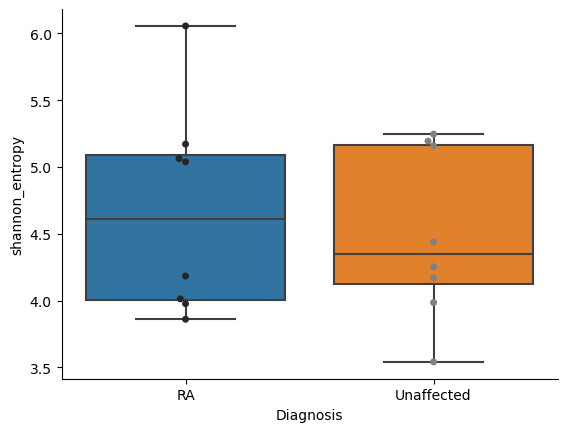

In [8]:
# paired shannon diversity difference from 0 
# this is from shannon_significance.qzv -> download as tsv
df_alpha = pd.read_csv(path + 'outputs/jobs02/metadata_shannon.tsv', sep='\t', index_col=0)
# df_alpha = pd.read_csv(path + 'outputs/jobs02/metadata_chao1.tsv', sep='\t', index_col=0)
# df_alpha = pd.read_csv(path + 'outputs/jobs02/metadata_observed.tsv', sep='\t', index_col=0)
# df_alpha = pd.read_csv(path + 'outputs/jobs02/metadata_evenness.tsv', sep='\t', index_col=0)

alpha_metric = 'shannon_entropy'
# alpha_metric = 'pielou_evenness' # n.s. except for diff alpha
# alpha_metric = 'observed_features' # n.s.
# alpha_metric = 'chao1' # n.s.



# drop unnecessary rows and cols
df_alpha = df_alpha.drop('#q2:types')
df_alpha = df_alpha.drop('Separate', axis=1)

# get paired per twin pair
pair_to_diff = {}
for p in list(df_alpha.TwinPair.values):
    df = df_alpha[df_alpha['TwinPair'] == p]
    alpha_UA = float(df[df['Diagnosis'] == 'Unaffected'][alpha_metric].values)
    alpha_RA = float(df[df['Diagnosis'] == 'RA'][alpha_metric].values)
    pair_to_diff[p] = alpha_RA - alpha_UA

df_paired_alpha = pd.DataFrame.from_dict(pair_to_diff, orient='index', columns=[alpha_metric + '_diff'])

# one-sided t-test, n.s.; RA-UA values 
t, p = scipy.stats.ttest_1samp(df_paired_alpha[alpha_metric + '_diff'],popmean=0)
print(t, p)

# boxplot of differences
#sns.boxplot(data=df_paired_alpha)
#sns.swarmplot(data=df_paired_alpha, palette='dark:grey')
#sns.despine()

# separate
df_alpha[alpha_metric] = df_alpha[alpha_metric].map(lambda x: float(x))
ax = sns.boxplot(data=df_alpha, x='Diagnosis', y=alpha_metric)
sns.swarmplot(data=df_alpha, x='Diagnosis', y=alpha_metric, palette='dark:grey')
sns.despine()

2.157852083851975 0.12431477869112205


<Axes: xlabel='category', ylabel='distance'>

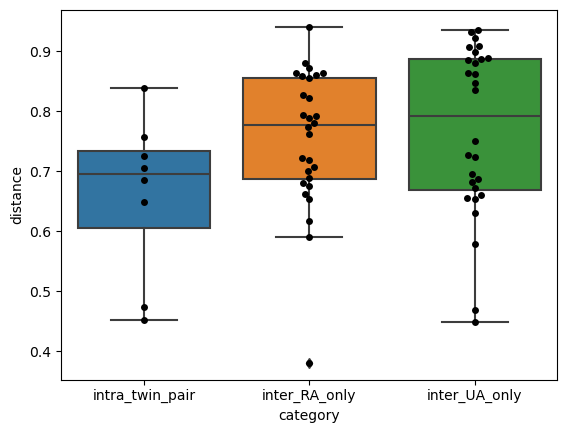

In [9]:
# paired beta div: unweighted distances to compare inter-twin vs inter-disease distances
# paired shannon diversity difference from 0 
df_beta = pd.read_csv(path + 'outputs/jobs02/Q2_outputs/bray_curtis_distance_matrix.tsv',
                      sep='\t', index_col=0)

# grab twin to pair dict
pair_to_ids = {}
for p in list(df_alpha.TwinPair.values):
    df = df_alpha[df_alpha['TwinPair'] == p]
    id_UA = str(df[df['Diagnosis'] == 'Unaffected'].index.values[0])
    id_RA = str(df[df['Diagnosis'] == 'RA'].index.values[0])
    pair_to_ids[p] = (id_UA, id_RA)

# get distances for each twin pair per beta div matrix    
pair_to_dist = {}
for p in list(df_alpha.TwinPair.values):
    id_UA, id_RA = pair_to_ids[p]
    pair_to_dist[p] = df_beta.loc[id_UA, id_RA]

df_paired_beta = pd.DataFrame.from_dict(pair_to_dist, orient='index', columns=['Bray_Curtis'])

# grab inter RA distances
# this is from bray_curtis_significance_Diagnosis.qzv -> download as tsv
df_raw = pd.read_csv(path + 'outputs/jobs02/bray_curtis_raw_data.tsv', 
                     sep='\t', index_col=0)
df_RA = df_raw[df_raw['Group1'] == 'RA']
df_RA = df_RA[df_RA['Group2'] == 'RA']
df_UA = df_raw[df_raw['Group1'] == 'Unaffected']
df_UA = df_UA[df_UA['Group2'] == 'Unaffected']

# compare distances
inter_twin = df_paired_beta['Bray_Curtis'].values
inter_RA = df_RA['Distance'].values
inter_UA = df_UA['Distance'].values

u, p = scipy.stats.mannwhitneyu(inter_twin, inter_RA)
#print(u, p)

t, p = scipy.stats.ttest_ind(inter_twin, inter_RA)
#print(t, p)

t, p = scipy.stats.ttest_ind(inter_UA, inter_RA)
# print(t, p)

f, p = scipy.stats.f_oneway(inter_UA, inter_RA, inter_twin)
print(f, p)

category = ['intra_twin_pair']*len(inter_twin) + ['inter_RA_only']*len(inter_RA) + ['inter_UA_only']*len(inter_UA)
distances = list(inter_twin) + list(inter_RA) + list(inter_UA)
df_dist = pd.DataFrame(data=np.array([category,distances]).T, columns=['category','distance'])
df_dist['distance'] = df_dist['distance'].astype(float)
df_dist.to_csv(path + 'outputs/jobs02/inter_intra_beta_dist.tsv',sep='\t')
                     
sns.boxplot(data=df_dist, x='category', y='distance')
sns.swarmplot(data=df_dist, x='category', y='distance', color='black')

0.10605488092640583 0.8994616481989534


<Axes: xlabel='category', ylabel='distance'>

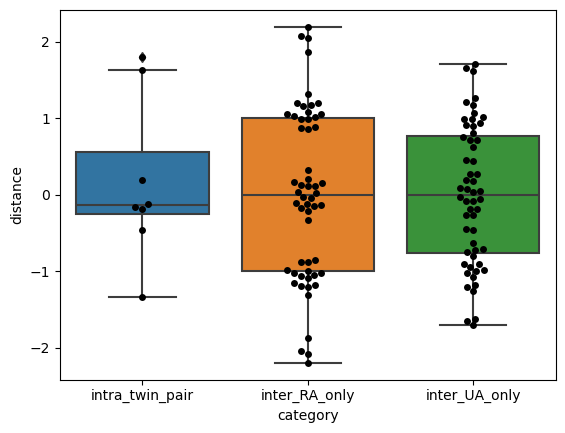

In [10]:
# paired alpha div: unweighted distances to compare inter-twin vs inter-disease distances
# paired shannon diversity difference from 0 
# grab twin to pair dict
# get distances for each twin pair per beta div matrix    
pair_to_dist = {}
for p in list(df_alpha.TwinPair.values):
    id_UA, id_RA = pair_to_ids[p]
    pair_to_dist[p] = df_alpha.loc[id_RA,alpha_metric] - df_alpha.loc[id_UA,alpha_metric]
    
df_alpha_inter = pd.DataFrame.from_dict(pair_to_dist, orient='index', columns=[alpha_metric])

# grab inter RA distances
df_RA = df_alpha[df_alpha['Diagnosis'] == 'RA']
RA_divs = list(df_RA[alpha_metric].values)
RA_diffs = [x - y for i,x in enumerate(RA_divs) for j,y in enumerate(RA_divs) if i != j]

# grab inter UA distances
df_UA = df_alpha[df_alpha['Diagnosis'] == 'Unaffected']
UA_divs = list(df_UA[alpha_metric].values)
UA_diffs = [x - y for i,x in enumerate(UA_divs) for j,y in enumerate(UA_divs) if i != j]

# compare distances
inter_twin = df_alpha_inter[alpha_metric].values
inter_RA = list(RA_diffs)
inter_UA = list(UA_diffs)

u, p = scipy.stats.mannwhitneyu(inter_twin, inter_RA)
# print(u, p)

t, p = scipy.stats.ttest_ind(inter_twin, inter_RA)
# print(t, p)

f, p = scipy.stats.f_oneway(inter_UA, inter_RA, inter_twin)
print(f, p)

category = ['intra_twin_pair']*len(inter_twin) + ['inter_RA_only']*len(inter_RA) + ['inter_UA_only']*len(inter_UA)
distances = list(inter_twin) + list(inter_RA) + list(inter_UA)
df_dist = pd.DataFrame(data=np.array([category,distances]).T, columns=['category','distance'])
df_dist['distance'] = df_dist['distance'].astype(float)
df_dist.to_csv(path + 'outputs/jobs02/inter_intra_alpha_dist.tsv',sep='\t')

sns.boxplot(data=df_dist, x='category', y='distance')
sns.swarmplot(data=df_dist, x='category', y='distance', color='black')

10.0 0.5714285714285714
0.7847404067976351 0.4624554060605416
0.09587007560175183 0.08939238572334704


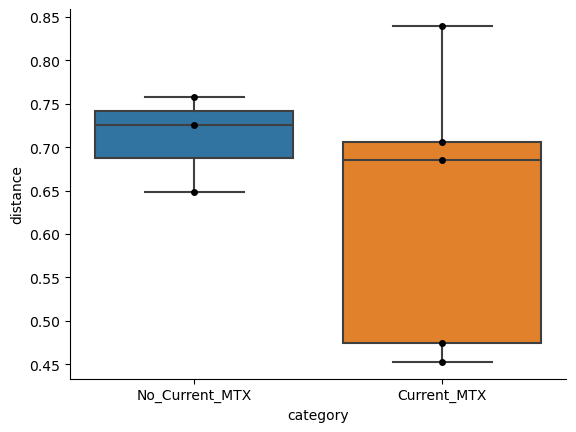

In [11]:
# investigate whether MTX treated twins converge to unaffected twins

# manually input metadata from Patient_data_KB.xls
samp_to_MTX = {
    '500A': 1,
    '502A': 1,
    '504A': 1,
    '506A': 0, # other DMARDs
    '508A': 0, # unclear? HCQ
    '510A': 1,
    '512A': 1,
    '514A': 0#, # previosuly, not currently
    #'516A.Fecal': 0, # in 2012, not currently,
}
# present MTX vs present biologic?
# to treatment
samp_to_tmt = {
    '500A': 1, # MTX
    '502A': 1, # MTX
    '504A': 1, # MTX
    '506A': 1, # other DMARDs
    '508A': 1, # on HCQ
    '510A': 1,
    '512A': 1,
    '514A': 0#, # previously, not currently
    #'516A.Fecal': 0, # in 2012, not currently,
}

# get copy
df_meta = df_map.copy()

# replace with column dict per above
df_meta['MTX'] = df_meta.index.map(samp_to_MTX)

# replace nan with 0 i.e. untreated
df_meta['MTX'] = df_meta['MTX'].fillna(0) 

# create TwinPair to MTX mapping
df = df_meta[df_meta['Diagnosis'] == 'RA'].set_index('TwinPair')
TP_to_MTX = df['MTX'].to_dict()

# Things to ask
# 1. Do the twin pair distances decrease in treated vs untreated twins?
df_paired_beta['MTX'] = df_paired_beta.index.map(TP_to_MTX)

# compare distances
inter_untreated = df_paired_beta[df_paired_beta['MTX'] == 0]['Bray_Curtis']
inter_treated = df_paired_beta[df_paired_beta['MTX'] == 1]['Bray_Curtis']

u, p = scipy.stats.mannwhitneyu(inter_untreated, inter_treated)
print(u, p)

t, p = scipy.stats.ttest_ind(inter_untreated, inter_treated)
print(t, p)

# sns.boxplot([inter_untreated, inter_treated])

category = ['No_Current_MTX']*len(inter_untreated) + ['Current_MTX']*len(inter_treated)
distances = list(inter_untreated) + list(inter_treated)
df_dist = pd.DataFrame(data=np.array([category,distances]).T, columns=['category','distance'])
df_dist['distance'] = df_dist['distance'].astype(float)

# f test of variance

F = np.var(inter_untreated) / np.var(inter_treated)
df1 = len(inter_untreated) - 1
df2 = len(inter_treated) - 1

p_value = scipy.stats.f.cdf(F, df1, df2)

print(F,p_value)

sns.boxplot(data=df_dist, x='category', y='distance')
sns.swarmplot(data=df_dist, x='category', y='distance', color='black')

df_dist = df_dist.rename(columns={'category':'MTX', 'distance': 'Bray_Curtis'})
# df_dist['MTX'] = df_dist['MTX'].map(lambda x: 'No_Current_MTX' if int(x) == 0 else 'Current_MTX')
df_dist.to_csv(path + 'outputs/jobs02/beta_MTX.tsv',sep='\t')

sns.despine()

11.0 0.39285714285714285
0.6711590447710831 0.5270980576728104
0.8890306398926742 0.5207570909770318


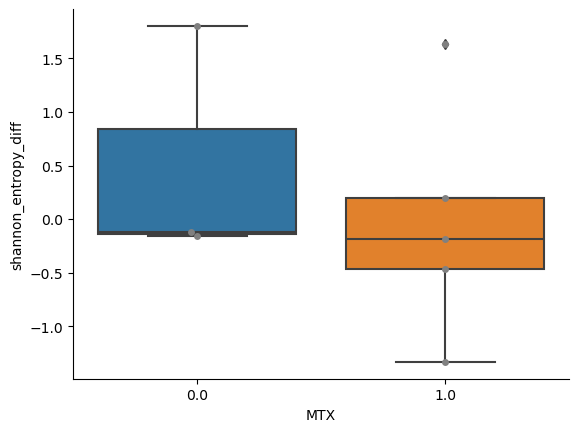

In [12]:
# compare distances
df_paired_div = pd.concat([df_paired_alpha, df_paired_beta], axis=1)

inter_untreated = df_paired_div[df_paired_div['MTX'] == 0][alpha_metric + '_diff']
inter_treated = df_paired_div[df_paired_div['MTX'] == 1][alpha_metric + '_diff']

u, p = scipy.stats.mannwhitneyu(inter_untreated, inter_treated)
print(u, p)

t, p = scipy.stats.ttest_ind(inter_untreated, inter_treated)
print(t, p)

# f test of variance

F = np.var(inter_untreated) / np.var(inter_treated)
df1 = len(inter_untreated) - 1
df2 = len(inter_treated) - 1

p_value = scipy.stats.f.cdf(F, df1, df2)

print(F,p_value)

#sns.boxplot([inter_untreated, inter_treated])
ax = sns.boxplot(data=df_paired_div, x='MTX', y=alpha_metric + '_diff')
sns.swarmplot(data=df_paired_div, x='MTX', y=alpha_metric + '_diff', color='grey')
df_paired_div['MTX'] = df_paired_div['MTX'].map(lambda x: 'No_Current_MTX' if x == 0 else 'Current_MTX')
df_paired_div.to_csv(path + 'outputs/jobs02/alpha_MTX.tsv',sep='\t')

sns.despine()

In [13]:
# add in metadata TJC and SJC
samp_to_TJC = {
    '501A': 0,
    '503A': 2,
    '505A': 8,
    '507A': 0,
    '509A': 0,
    '511A': 0,
    '513A': 0,
    '515A': 0,
    '500A': 1, 
    '502A': 7, 
    '504A': 25, 
    '506A': 21, 
    '508A': 13,
    '510A': 0,
    '512A': 4,
    '514A': 12
}

samp_to_SJC = {
    '501A': 0,
    '503A': 0,
    '505A': 2,
    '507A': 0,
    '509A': 0,
    '511A': 0,
    '513A': 0,
    '515A': 0,
    '500A': 1, 
    '502A': 7, 
    '504A': 27, 
    '506A': 3, 
    '508A': 6,
    '510A': 0,
    '512A': 1,
    '514A': 5
}

# why is 510 so well controlled...? even w/o steroids
# Actinomycetales?

# correlate SJC/TJC with distance
df_meta = df_map.copy()

# replace with column dict per above
df_meta['TJC'] = df_meta.index.map(samp_to_TJC)
df_meta['SJC'] = df_meta.index.map(samp_to_SJC)

# create TwinPair to var mapping
df = df_meta[df_meta['Diagnosis'] == 'RA'].set_index('TwinPair')
TP_to_TJC = df['TJC'].to_dict()
TP_to_SJC = df['SJC'].to_dict()

# create column in paired beta
df_paired_beta['SJC'] = df_paired_beta.index.map(TP_to_SJC)
df_paired_beta['TJC'] = df_paired_beta.index.map(TP_to_TJC)

df_paired_beta.head()

,Bray_Curtis,MTX,SJC,TJC
T2,0.705551,1.0,1,1
T3,0.474034,1.0,7,7
T4,0.685602,1.0,27,25
T5,0.725669,0.0,3,21
T6,0.757568,0.0,6,13


In [14]:
# conduct correlation
'''
r, p = scipy.stats.pearsonr(x=df_paired_beta['Bray_Curtis'],y=df_paired_beta['SJC'])
sns.lmplot(data=df_paired_beta, x='Bray_Curtis', y='SJC')
print(r, p)

r, p = scipy.stats.pearsonr(x=df_paired_beta['Bray_Curtis'],y=df_paired_beta['TJC'])
sns.lmplot(data=df_paired_beta, x='Bray_Curtis', y='TJC')
print(r, p)

r, p = scipy.stats.spearmanr(a=df_paired_beta['Bray_Curtis'],b=df_paired_beta['SJC'])
print(r, p)

r, p = scipy.stats.spearmanr(a=df_paired_beta['Bray_Curtis'],b=df_paired_beta['TJC'])
print(r, p)

# alpha version of plot
df_paired_div = pd.concat([df_paired_alpha, df_paired_beta], axis=1)

r, p = scipy.stats.pearsonr(x=df_paired_div[alpha_metric + '_diff'],y=df_paired_div['TJC'])
sns.lmplot(data=df_paired_div, x=alpha_metric + '_diff', y='TJC')
print(r, p)

r, p = scipy.stats.pearsonr(x=df_paired_div[alpha_metric + '_diff'],y=df_paired_div['SJC'])
sns.lmplot(data=df_paired_div, x=alpha_metric + '_diff', y='SJC')
print(r, p)

r, p = scipy.stats.spearmanr(a=df_paired_div[alpha_metric + '_diff'],b=df_paired_div['TJC'])
print(r, p)

r, p = scipy.stats.spearmanr(a=df_paired_div[alpha_metric + '_diff'],b=df_paired_div['SJC'])
print(r, p)
'''

"\nr, p = scipy.stats.pearsonr(x=df_paired_beta['Bray_Curtis'],y=df_paired_beta['SJC'])\nsns.lmplot(data=df_paired_beta, x='Bray_Curtis', y='SJC')\nprint(r, p)\n\nr, p = scipy.stats.pearsonr(x=df_paired_beta['Bray_Curtis'],y=df_paired_beta['TJC'])\nsns.lmplot(data=df_paired_beta, x='Bray_Curtis', y='TJC')\nprint(r, p)\n\nr, p = scipy.stats.spearmanr(a=df_paired_beta['Bray_Curtis'],b=df_paired_beta['SJC'])\nprint(r, p)\n\nr, p = scipy.stats.spearmanr(a=df_paired_beta['Bray_Curtis'],b=df_paired_beta['TJC'])\nprint(r, p)\n\n# alpha version of plot\ndf_paired_div = pd.concat([df_paired_alpha, df_paired_beta], axis=1)\n\nr, p = scipy.stats.pearsonr(x=df_paired_div[alpha_metric + '_diff'],y=df_paired_div['TJC'])\nsns.lmplot(data=df_paired_div, x=alpha_metric + '_diff', y='TJC')\nprint(r, p)\n\nr, p = scipy.stats.pearsonr(x=df_paired_div[alpha_metric + '_diff'],y=df_paired_div['SJC'])\nsns.lmplot(data=df_paired_div, x=alpha_metric + '_diff', y='SJC')\nprint(r, p)\n\nr, p = scipy.stats.spearma

In [15]:
# get alpha against TJC/SJC
df_meta_new = df_meta.copy()
df_meta_new.index = df_meta_new.index.map(lambda x: x.split('.')[0])
df_meta_new = df_meta_new.drop(['Diagnosis','TwinPair','TJC','SJC','Diagnosis'],axis=1)
df = pd.concat([df_meta_new,df_alpha], axis=1)
df = df[df['Diagnosis'] == 'RA'].set_index('TwinPair')
df = pd.concat([df,df_paired_beta],axis=1)
df = df.drop('Diagnosis',axis=1)
df.to_csv(path + 'outputs/jobs02/df_beta_meta.tsv',sep='\t')



In [16]:
# Pathway data from humann3
# df_pathway 8579 cols
# df_path = pd.read_csv(path + 'outputs/ensemble_humann3/humann3_joined_pathabundance_no_misses_relabund.tsv', sep='\t', index_col=0)
df_path = pd.read_csv(path + 'outputs/jobs08/KOs_no_misses_relabund_kegg.tsv', sep='\t', index_col=0)
df_path = df_path.T

# drop unintegrated, unmapped and normalize
for x in list(df_path.columns.values):
    if 'UNMAPPED' in x or 'UNINTEGRATED' in x:
        df_path = df_path.drop(x, axis=1)

# drop 
drops = ['EMPTY',	'M',	'E',	'T',	'P',	'Y']
df_path = df_path.drop(drops,axis=1)

# normalize; first you obtain row sums (axis=1 specifies that weirdly) and then divide on a row basis
# df_path = df_path.div(df_path.sum(axis=1),axis=0)

# change special chars
df_path.columns = df_path.columns.map(lambda x: x.replace('\'', 'prime'))
df_path.index = df_path.index.map(lambda x: x.split('_')[0])

# grab top 100 asv by mean rel abundance
sorted_means = df_path.mean(axis=0).sort_values(ascending=False)
top_100 = sorted_means[:100].index.values
df_path_top100 = df_path.loc[:,top_100]
df_path_top100.to_csv(path + 'inputs/df_path_top100.tsv', sep='\t')

df_path.to_csv(path + 'inputs/df_path_mp4all.tsv', sep='\t')
df_path_top100.head()

metadata_KEGG_Pathways,Metabolism,Genetic Information Processing,Genetic Information Processing|Translation,Genetic Information Processing|Translation|Ribosome,Metabolism|Carbohydrate metabolism,Metabolism|Amino acid metabolism,Metabolism|Metabolism of cofactors and vitamins,Metabolism|Energy metabolism,Environmental Information Processing,Metabolism|Nucleotide metabolism,...,Organismal Systems|Environmental adaptation|Plant-pathogen interaction,Metabolism|Carbohydrate metabolism|Propanoate metabolism,Metabolism|Glycan biosynthesis and metabolism|O-Antigen nucleotide sugar biosynthesis,Metabolism|Metabolism of other amino acids|D-Amino acid metabolism,Human Diseases|Infectious disease: bacterial|Legionellosis,Human Diseases|Drug resistance: antimicrobial|beta-Lactam resistance,Organismal Systems|Aging|Longevity regulating pathway - worm,Cellular Processes|Cell motility|Flagellar assembly,Metabolism|Carbohydrate metabolism|Butanoate metabolism,Human Diseases|Cancer: overview
500A,0.325986,0.294074,0.235304,0.206306,0.064753,0.065598,0.054545,0.038364,0.032569,0.035376,...,0.003924,0.002142,0.003008,0.002636,0.002941,0.002417,0.002686,0.001133,0.002486,0.001855
501A,0.334549,0.233318,0.178332,0.152325,0.070002,0.062591,0.054963,0.041637,0.038675,0.036591,...,0.002530,0.002752,0.002214,0.002014,0.002221,0.001852,0.002132,0.002200,0.001666,0.001909
502A,0.355141,0.244382,0.186823,0.160917,0.076275,0.064360,0.062004,0.042723,0.029320,0.038488,...,0.003245,0.002989,0.002452,0.002137,0.002758,0.002790,0.002641,0.001436,0.002226,0.002371
503A,0.336738,0.228318,0.175192,0.151843,0.071781,0.056697,0.060269,0.041416,0.040608,0.036610,...,0.002804,0.003322,0.002271,0.001996,0.002508,0.002577,0.002350,0.004289,0.001951,0.002250
504A,0.347150,0.239916,0.182507,0.156919,0.073963,0.065695,0.054216,0.041697,0.035611,0.038717,...,0.002932,0.003112,0.003213,0.001732,0.002525,0.002572,0.002505,0.003017,0.002272,0.001964


In [17]:
# df_meta: TwinPair, Diagnosis, TJC and SJC
df_meta_edit = df_meta.copy()
df_meta_edit.index = df_meta_edit.index.map(lambda x: x.split('.')[0])
#df_meta_edit = df_meta_edit.drop(['516A','517A'])
df_meta_edit.head()

,TwinPair,Diagnosis,TJC,SJC
#SampleID,,,,
500A,T2,RA,1,1
501A,T2,Unaffected,0,0
502A,T3,RA,7,7
503A,T3,Unaffected,2,0
504A,T4,RA,25,27


In [18]:
# OLINK cytokine data, 92 columns
# drop OG rows 2-10 (1 indexed) and 20, the avg of 501 and 503 are used b/c they have repeat measures
df_olink = pd.read_csv(path + 'inputs/RA_twins/Normalized Olink TWINRA_RBB/Norm_Olink_TWINRA_KB.csv', index_col='Sample ID')
df_olink = df_olink.drop(['mtx Responder?','Twin pair','Timepoint','Group','Project','Dx', 'barcode'], axis=1)
df_olink = df_olink.dropna()
df_olink = df_olink.iloc[8:,:]

# for cleaning purposes and consistency:
# n this step, I removed columns (biomarkers) with 6 or more negative values. 
# There were 92 biomakers before the data cleaning, and I kept 86 of them. 
# get sum of number of negative values per column, hence axis = 0 which is default
df_olink = df_olink.loc[:, ((df_olink < 0).sum(axis=0) <= 5)]

# Also, I replaced all negative values in those 86 biomarkers with 0.
df_olink[df_olink < 0] = df_olink

# make index match other data
df_olink.index = df_olink.index.map(lambda x: x.split('.')[1] + 'A')

# drop 516, 517
df_olink = df_olink.drop(['516A','517A'])

# export for R
df_olink_R = df_map.copy()
df_olink_R['Subject'] = df_olink_R.index.map(lambda x: x.split('A')[0])
df_olink_R = pd.concat([df_olink_R, df_olink], axis=1)
df_olink_R['Diagnosis'] = df_olink_R['Diagnosis'].replace('Unaffected','1_Unaffected')
df_olink_R['Diagnosis'] = df_olink_R['Diagnosis'].replace('RA','2_RA')
df_olink_R = df_olink_R.rename(columns={'TwinPair':'Sibling_pair'})
df_olink_R['Sibling_pair'] = df_olink_R['Sibling_pair'].map(lambda x: 'sib_0' + str(int(x.split('T')[1])-1))
df_olink_R.to_csv(path + 'inputs/df_olink_R.tsv', sep='\t', index=True)

df_olink.head()

,IL8,VEGFA,CD8A,MCP.3,GDNF,CDCP1,CD244,IL7,OPG,LAP.TGF.beta.1,...,CX3CL1,TNFRSF9,NT.3,TWEAK,CCL20,ST1A1,STAMBP,ADA,TNFB,CSF.1
Sample ID,,,,,,,,,,,,,,,,,,,,,
501A,4.460090,11.747740,10.112573,0.692187,1.39987,3.256127,5.67191,0.716623,9.629157,6.129923,...,4.15028,6.636600,1.995827,9.269563,5.610247,1.866237,5.395570,6.546317,3.851637,9.882993
503A,5.640333,11.811737,9.727983,1.801717,1.41795,3.843057,5.06545,0.807270,9.408657,6.907237,...,4.50843,6.256277,2.298063,9.381473,7.969883,2.666090,6.828657,6.373057,4.304750,9.600263
505A,5.183700,11.414580,8.847250,0.740210,1.03830,3.077490,5.54233,0.497640,9.908030,6.267330,...,4.46019,6.141750,2.900720,9.146430,5.922580,2.619130,5.220380,6.155300,4.564380,9.629940
507A,4.888180,11.082720,9.029760,0.787420,0.93138,3.108910,5.12005,0.297860,9.616240,6.038080,...,3.95748,5.397950,0.909560,8.876210,6.204450,2.527400,4.836990,6.085700,3.006930,9.412340
509A,6.051210,12.279060,10.656030,1.387800,1.17672,4.046590,5.35261,2.330700,9.917410,7.123720,...,3.76442,6.645510,1.887630,9.608720,7.496650,4.781400,7.217610,6.351550,4.694640,9.953740


In [19]:
# metabolon
df_mb = pd.read_csv(path + 'inputs/Metabolon_SCFA_TWIN RA copy_KB_Sheet2.csv', skiprows=2)
df_mb = df_mb.iloc[:-1,:-3] # drop unnamed trailing col and trailing row
df_mb = df_mb.rename(columns={'Unnamed: 0':'Diagnosis', 'Unnamed: 1': 'SampleID'})#'Sibling_pair'})
df_mb['SampleID'] = df_mb['SampleID'].astype(str)
df_mb['SampleID'] = df_mb['SampleID'].map(lambda x: x.split('twinRA.')[1] + 'A')
df_mb = df_mb.set_index('SampleID')
df_mb = df_mb.drop('Diagnosis',axis=1)
df_mb = df_mb.drop(['516A','517A'])

# replace <0 with 0
df_mb = df_mb.replace('< 0',0)

# convert for R
df_mb_R = pd.concat([df_map, df_mb],axis=1)
df_mb_R['Diagnosis'] = df_mb_R['Diagnosis'].replace('Unaffected','1_Unaffected')
df_mb_R['Diagnosis'] = df_mb_R['Diagnosis'].replace('RA','2_RA')
df_mb_R = df_mb_R.rename(columns={'TwinPair':'Sibling_pair'})
df_mb_R['Sibling_pair'] = df_mb_R['Sibling_pair'].map(lambda x: 'sib_0' + str(int(str(x).split('T')[1])-1))
df_mb_R.to_csv(path + 'inputs/df_mb_R.tsv', sep='\t', index=True)

df_mb.head()


,2-Methylbutyric acid,Acetic acid,Butyric acid,Hexanoic acid,Isobutyric acid,Isovaleric acid,Propionic acid,Valeric acid,Tot SCFA,Tot butyric acid
SampleID,,,,,,,,,,
501A,215,1870,94.7,86.4,86.0,231,151,18.0,2752.0,395.936284
503A,93.6,2708,16.4,83.8,44.9,50.5,94.2,10.7,3102.0,154.936779
505A,68.3,2217,0,56.0,35.3,44.9,101,7.51,2530.0,103.613311
507A,66.9,1495,4.88,75.7,43.6,40.9,80.3,5.32,1813.0,115.366995
509A,47.9,887,48.1,93.9,24.6,38.6,86.4,18.7,1245.0,120.617455


In [20]:
# SCFA new RB
df_rbfa = pd.read_csv(path + 'inputs/240215_MTX_SCFA_TwinsRA_RB.csv')
df_rbfa = df_rbfa.set_index('Sample Name')
df_rbfa.index = df_rbfa.index.map(lambda x: str(x).split(' TW')[0] + 'A')
df_rbfa = df_rbfa.drop(['NMR File Name', 'NMR Weight (mg)'],axis=1)
df_rbfa = df_rbfa.rename(columns={'Twin pair':'Sibling_pair', 'NMR Order': 'Diagnosis'})
df_rbfa['Diagnosis'] = df_rbfa['Sibling_pair'].apply(lambda x: '1_Unaffected' if 'unaffected' in str(x) else '2_RA')
df_rbfa = df_rbfa.drop(['nanA','516A','517A'])
df_rbfa['Sibling_pair'] = df_rbfa['Sibling_pair'].apply(lambda x: 'sib_0' + str(x)[-1])
df_rbfa.columns = df_rbfa.columns.str.replace('(umol/g)','')
df_rbfa.to_csv(path + 'inputs/df_rbfa_R.tsv', sep='\t', index=True)
df_rbfa = df_rbfa.drop(['Sibling_pair','Diagnosis'],axis=1)
df_rbfa.head()

,Acetate,Butyrate,Propionate,tot SCFA
Sample Name,,,,
501A,135.049497,77.113883,29.145272,241.308652
503A,71.141520,28.898246,22.180117,122.219883
505A,36.701426,5.819145,14.414664,56.935234
507A,26.977336,7.025845,4.275149,38.278330
509A,23.517160,4.463905,4.963314,32.944379


In [21]:
# metabolites, fatty acids; 11 collumns
df_fa = pd.read_csv(path + 'inputs/RA_twins/Metabolites/metabolites_KB.csv', index_col=0)
df_fa = df_fa.drop(['Subject','Sibling_pair'], axis=1)
df_fa = df_fa.drop(['182A','183A', 'Missing 507A', '517A','516A'])
df_fa = df_fa.dropna()
df_fa.head()

,Acetate,Propionate,Butyrate,Isovalerate,Valerate,Hexanoate,Heptanoate,Octanoate,Nonanoic_acid,Decanoic_acid,Dodecanoic_acid
SampleID,,,,,,,,,,,
500A,63.203350,0.018168,0.123664,0.071874,0.258681,0.067507,0.000151,0.009360,0.003035,0.000109,18.961611
501A,144.772864,0.024557,0.257001,0.023236,0.018034,0.814973,0.012756,0.013322,0.003790,0.000128,23.364729
502A,24.348469,0.007449,0.103740,0.043493,0.186273,0.159585,0.000869,0.015359,0.002884,0.000077,6.222841
503A,72.685492,0.027111,0.183125,0.014804,0.036577,0.014324,0.000465,0.070759,0.004436,0.000069,11.350637
504A,27.178033,0.002476,0.022492,0.086892,0.271040,0.079170,0.010737,0.184629,0.012075,0.000072,26.324529


In [22]:
# plasma analytes
# 49 useful rows
#df_plasma = pd.read_csv(path + 'inputs/RA_twins/Analytes/Plasma_Analytes_COMPARISON_KB.csv', index_col=0)
df_plasma = pd.read_csv(path + 'inputs/RA_twins/Analytes/Plasma_Analytes_COMPARISON_KB.csv', index_col=0)
df_plasma = df_plasma.iloc[:48].T
df_plasma = df_plasma.drop(['Units','AVG1','TTEST','AVG2'])
df_plasma.index = df_plasma.index.map(lambda x: x.split('_')[0])
df_plasma = df_plasma.drop(['182A','183A','516A','517A'])

#df_fa = df_fa.drop(['Subject','Sibling_pair'], axis=1)
#df_fa = df_fa.drop(['182A','183A', 'Missing 507A'])
df_plasma.head()

Analyte,Hu IL-1b,Hu IL-1ra,Hu IL-2,Hu IL-4,Hu IL-5,Hu IL-6,Hu IL-7,Hu IL-8,Hu IL-9,Hu IL-10,...,Hu MCP-3,Hu M-CSF,Hu MIF,Hu MIG,Hu b-NGF,Hu SCF,Hu SCGF-b,Hu SDF-1a,Hu TNF-b,Hu TRAIL
500A,3.0,115.7,0.0,3.8,3.9,10.1,10.5,12.0,6.9,4.7,...,14.7,5.7,796.8,412.4,5.3,135.4,13591.9,690.5,0.0,87.4
502A,9.1,680.9,32.1,12.4,19.8,30.8,35.4,30.4,158.6,38.8,...,44.9,0.0,621.4,83.9,10.5,71.7,9937.8,868.5,0.0,95.4
504A,20.6,1338.8,100.1,42.3,36.1,80.4,69.3,126.4,86.7,92.7,...,4.0,0.0,586.0,277.8,4.9,50.6,7509.3,567.4,0.0,12.0
506A,5.4,280.1,0.0,9.0,9.9,19.2,17.2,25.1,12.0,17.9,...,20.6,0.0,691.8,221.2,7.5,73.8,7230.9,703.9,0.0,103.4
508A,5.1,307.7,5.5,7.9,8.7,15.1,15.3,20.6,39.8,19.6,...,29.6,5.4,827.0,355.0,10.3,73.8,8600.2,875.8,6.4,91.4


In [23]:
# acpas fecal
df_acpa_fecal = pd.read_csv(path + 'inputs/RA_twins/ACPA/CCP_Fecal_Analytes_COMPARISON_KB.csv', index_col=0)

# concatenate index
df_acpa_fecal.index = df_acpa_fecal.index + '_' + df_acpa_fecal['Secondary'] + '_Fecal'

# transpose
df_acpa_fecal = df_acpa_fecal.T

# drop useless rows
df_acpa_fecal = df_acpa_fecal.drop(['Secondary','Units', 'AVG1','TTESTP','AVG2','182A_F','183A_F', '516A_F','517A_F'])

# convert to normal
df_acpa_fecal.index = df_acpa_fecal.index.map(lambda x: x.split('_')[0])
df_acpa_fecal.head()

,Biglycan 247-266 sm-1 cyclic _IgG_Fecal,Clusterin 231-250 sm-1 cyclic _IgG_Fecal,Mix B RBB _IgA_Fecal,ApoE 277-296 Cit2 sm2 cyclic _IgG_Fecal,H2B/a 62-81 cyclic _IgG_Fecal,ApoA1 Cit _IgG_Fecal,Mix C RBB _IgA_Fecal,FibrinogenB 36-52 cit _IgG_Fecal,FibrinogenB 246-267 cit _IgG_Fecal,Vimentin 58-77 cit3 cyclic small-1 _IgG_Fecal,...,Vimentin _IgG_Fecal,Fibrinogen _IgG_Fecal,Fibrinogen cit _IgG_Fecal,Filaggrin 48-65 arg2 v1 cyclic _IgG_Fecal,Fibronectin cit _IgA_Fecal,FibrinogenA 556-575 sm cyclic _IgG_Fecal,Histones2B cit _IgG_Fecal,Fibronectin cit 1029-1042 cit2 _IgG_Fecal,FibrinogenA 211-230 cit small cyclic _IgG_Fecal,Mix B RBB _IgG_Fecal
500A,18,15,47,47,16,18,48,23,21,17,...,31,136,109,17,131,18,17,17,32,43
502A,20,15,48,45,16,19,48,21,20,17,...,29,143,113,15,132,17,37,16,30,45
504A,18,16,50,46,15,19,45,23,20,15,...,26,130,109,16,135,17,18,15,33,44
506A,19,15,46,45,16,22,48,23,19,17,...,27,129,109,15,138,14,15,17,32,47
508A,33,22,78,50,18,21,62,23,19,15,...,28,130,108,20,141,22,20,17,33,49


In [24]:
# acpas plasma
df_acpa_plasma = pd.read_csv(path + 'inputs/RA_twins/ACPA/CCP_Plasma_Analytes_COMPARISON_KB.csv', index_col=0)

# convert first nan to ccp
df_acpa_plasma.iloc[0,0] = 'ccpnan'

# concatenate index
df_acpa_plasma.index = df_acpa_plasma.index + '_' + df_acpa_plasma['Secondary'] + '_Plasma'

# transpose
df_acpa_plasma = df_acpa_plasma.T

# drop useless rows
df_acpa_plasma = df_acpa_plasma.drop(['Secondary','Units', 'AVG1','TTESTP','AVG2','182A_P','183A_P', '516A_P', '517A_P'])

# convert to normal
df_acpa_plasma.index = df_acpa_plasma.index.map(lambda x: x.split('_')[0])
df_acpa_plasma.head()

,CCP 3.1_ccpnan_Plasma,FibrinogenA 41-60 cit3 cyclic _IgA_Plasma,FibrinogenA 27-43 cit _IgA_Plasma,Biglycan 247-266 cit sm-1 cyclic _IgA_Plasma,FibrinogenA 41-60 cyclic _IgA_Plasma,H2B/a 62-81 cyclic _IgA_Plasma,ApoE 277-296 Cit2 sm2 cyclic _IgG_Plasma,Enolase-1A 5-21 cit _IgA_Plasma,FibrinogenA 556-575 sm cyclic _IgA_Plasma,FibrinogenB 54-72 _IgA_Plasma,...,ApoA1 Cit _IgA_Plasma,H2B/a 62-81 cit cyclic _IgG_Plasma,Histones2B _IgG_Plasma,ApoA1 _IgA_Plasma,Mix C SVB _IgA_Plasma,Histones2A cit _IgG_Plasma,H2A/a 1-20 cit sm-2 cyclic _IgA_Plasma,Histones2A cit _IgA_Plasma,FibrinogenA 556-575 cit sm cyclic _IgA_Plasma,Vimentin 58-77 cit3 cyclic small-1 _IgA_Plasma
500A,0,21,44,32,33,38,64,67,36,43,...,19,35,46,20,45,34,47,34,29,51
502A,94384.5,46.0,36.0,53.0,65.0,74.0,75.0,437.0,79.0,74.0,...,35.0,233.0,47.0,26.0,89.0,722.0,166.0,154.0,66.0,228.0
504A,4406.13,22.0,25.0,26.0,27.0,32.0,64.0,137.0,29.0,37.0,...,21.0,34.0,45.0,19.0,49.0,55.0,29.0,437.0,26.0,25.0
506A,1010,26,26,36,43,42,113,64,43,53,...,24,79,88,29,77,31,34,125,32,30
508A,47444.8,51.0,33.0,36.0,41.0,48.0,83.0,347.0,52.0,58.0,...,23.0,1101.0,56.0,26.0,76.0,247.0,34.0,83.0,61.0,49.0


In [25]:
# combine them all!
#df_final = pd.concat([df_meta_edit, df_otu, df_path, df_olink, df_fa, df_acpa_fecal, df_acpa_plasma, df_plasma, df_rbfa, df_mb], axis=1)
#df_final = df_final.drop(['TwinPair'],axis=1)
#df_final.columns = df_final.columns.map(lambda x: x.replace('\'','prime'))
#df_final.to_csv(path + 'inputs/df_final.tsv', sep='\t',index_label='SampleID')

# combine them all except OTU and path
df_quant = pd.concat([df_meta_edit, df_olink, df_fa, df_acpa_fecal, df_acpa_plasma, df_plasma, df_rbfa, df_mb], axis=1)
df_quant = df_quant.drop(['TwinPair'],axis=1)
df_quant.columns = df_quant.columns.map(lambda x: x.replace('\'','prime'))
df_quant.columns = df_quant.columns.map(lambda x: x.strip())
df_quant.to_csv(path + 'inputs/df_quant.tsv', sep='\t',index_label='SampleID')

# create new df for asv
df_asv = pd.concat([df_meta_edit, df_otu], axis=1) 
df_asv = df_asv.drop(['TwinPair','SJC','TJC'],axis=1)
df_asv.to_csv(path + 'inputs/df_asv.tsv', sep='\t',index_label='SampleID')

# get top 100 df asv
df_dx = df_asv['Diagnosis']
df_asv100 = df_asv.drop(['Diagnosis'],axis=1).T
df_asv100['sum'] = df_asv100.sum(axis=1)
df_asv100 = df_asv100.sort_values(by = 'sum', ascending=False)
df_asv100 = df_asv100.iloc[0:100,:].T
sums = df_asv100.loc['sum',:]
df_asv100 = df_asv100.drop('sum')
df_asv100_pre=df_asv100.copy()
df_asv100.to_csv(path + 'inputs/df_asv100.tsv', sep='\t',index_label='SampleID')
df_asv100dx = pd.concat([df_asv100, df_dx],axis=1)

# subset for CUTIE into sep groups
df_asv_RA = df_asv100dx[df_asv100dx['Diagnosis'] == 'RA']
df_asv_RA = df_asv_RA.drop('Diagnosis',axis=1)
df_asv_RA.to_csv(path + 'inputs/df_asv_RA.tsv', sep='\t',index_label='SampleID')
df_asv_UA = df_asv100dx[df_asv100dx['Diagnosis'] == 'Unaffected']
df_asv_UA = df_asv_UA.drop('Diagnosis',axis=1)
df_asv_UA.to_csv(path + 'inputs/df_asv_UA.tsv', sep='\t',index_label='SampleID')

df_quant_RA = df_quant[df_quant['Diagnosis'] == 'RA']
df_quant_RA = df_quant_RA.drop('Diagnosis',axis=1)
df_quant_RA.to_csv(path + 'inputs/df_quant_RA.tsv', sep='\t',index_label='SampleID')
df_quant_UA = df_quant[df_quant['Diagnosis'] == 'Unaffected']
df_quant_UA = df_quant_UA.drop('Diagnosis',axis=1)
df_quant_UA.to_csv(path + 'inputs/df_quant_UA.tsv', sep='\t',index_label='SampleID')


# combine them all
df_quant = pd.concat([df_meta_edit, df_olink, df_fa, df_acpa_fecal, df_acpa_plasma, df_plasma, df_rbfa, df_mb, df_asv100, df_path_top100], axis=1)
df_quant = df_quant.drop(['TwinPair'],axis=1)
df_quant.columns = df_quant.columns.map(lambda x: x.replace('\'','prime'))
df_quant.columns = df_quant.columns.map(lambda x: x.strip())
df_quant.to_csv(path + 'inputs/df_quant_R.tsv', sep='\t',index_label='SampleID')
df_quant.to_csv(path + 'inputs/df_quant_R_meta.tsv', sep='\t',index_label='SampleID')

df_asv100_pre.head()


,k Bacteria|p Bacteroidetes|c Bacteroidia|o Bacteroidales|f Bacteroidaceae|g Phocaeicola|s Phocaeicola vulgatus,k Bacteria|p Bacteroidetes|c Bacteroidia|o Bacteroidales|f Bacteroidaceae|g Bacteroides|s Bacteroides uniformis,k Bacteria|p Bacteroidetes|c Bacteroidia|o Bacteroidales|f Bacteroidaceae|g Bacteroides|s Bacteroides ovatus,k Bacteria|p Bacteroidetes|c Bacteroidia|o Bacteroidales|f Bacteroidaceae|g Bacteroides|s Bacteroides stercoris,k Bacteria|p Bacteroidetes|c Bacteroidia|o Bacteroidales|f Bacteroidaceae|g Phocaeicola|s Phocaeicola dorei,k Bacteria|p Firmicutes|c Clostridia|o Eubacteriales|f Lachnospiraceae|g Lachnospiraceae unclassified|s Eubacterium rectale,k Bacteria|p Bacteroidetes|c Bacteroidia|o Bacteroidales|f Rikenellaceae|g Alistipes|s Alistipes onderdonkii,k Bacteria|p Bacteroidetes|c Bacteroidia|o Bacteroidales|f Bacteroidaceae|g Phocaeicola|s Phocaeicola plebeius,k Bacteria|p Firmicutes|c CFGB3002|o OFGB3002|f FGB3002|g GGB9463|s GGB9463 SGB14855,k Bacteria|p Bacteroidetes|c Bacteroidia|o Bacteroidales|f Rikenellaceae|g Alistipes|s Alistipes putredinis,...,k Bacteria|p Firmicutes|c Erysipelotrichia|o Erysipelotrichales|f Erysipelotrichaceae|g Faecalicoccus|s Faecalicoccus SGB6321,k Bacteria|p Bacteroidetes|c Bacteroidia|o Bacteroidales|f Bacteroidaceae|g Bacteroides|s Bacteroides caecicola,k Bacteria|p Firmicutes|c Clostridia|o Eubacteriales|f Lachnospiraceae|g Blautia|s Blautia faecis,k Bacteria|p Firmicutes|c Clostridia|o Eubacteriales|f Oscillospiraceae|g GGB9699|s GGB9699 SGB15216,k Bacteria|p Firmicutes|c Clostridia|o Eubacteriales|f Clostridiaceae|g GGB9782|s GGB9782 SGB15403,k Bacteria|p Firmicutes|c CFGB1354|o OFGB1354|f FGB1354|g GGB3304|s GGB3304 SGB4367,k Bacteria|p Firmicutes|c Clostridia|o Eubacteriales|f Eubacteriales unclassified|g Eubacteriales unclassified|s Clostridiales bacterium,k Bacteria|p Actinobacteria|c Coriobacteriia|o Coriobacteriales|f Coriobacteriaceae|g Collinsella|s Collinsella aerofaciens,k Bacteria|p Firmicutes|c Clostridia|o Eubacteriales|f Eubacteriaceae|g Eubacterium|s Eubacterium ventriosum,k Bacteria|p Firmicutes|c CFGB1126|o OFGB1126|f FGB1126|g GGB2848|s GGB2848 SGB3813
500A,0.063512,0.260751,0.002257,0.017321,0.000083,0.004326,0.000645,0.023989,0.0,0.007745,...,0.000000,0.0,0.000338,0.000002,0.000000,0.000000,0.001485,0.000450,0.000000,0.000049
501A,0.135520,0.074287,0.029319,0.039050,0.000000,0.026713,0.027435,0.064394,0.0,0.000000,...,0.000000,0.0,0.003508,0.000000,0.000000,0.001311,0.000216,0.001697,0.001006,0.000053
502A,0.213437,0.130766,0.017082,0.238545,0.000000,0.038197,0.000000,0.000000,0.0,0.021635,...,0.000000,0.0,0.001426,0.004609,0.000000,0.000000,0.003220,0.005733,0.002600,0.000000
503A,0.151226,0.170454,0.026042,0.083876,0.000000,0.054987,0.000000,0.000000,0.0,0.012060,...,0.000000,0.0,0.000887,0.000000,0.000000,0.000000,0.005609,0.000000,0.000000,0.000000
504A,0.102240,0.151471,0.001853,0.077741,0.000000,0.000000,0.001610,0.000000,0.0,0.028988,...,0.015799,0.0,0.001414,0.000000,0.002541,0.000000,0.001223,0.000000,0.000000,0.000000


In [26]:
# subset for dgca subplots
name_to_df = {
    'olink':df_olink,
    'fa': df_fa,
    'acpa_fecal': df_acpa_fecal,
    'acpa_plasma': df_acpa_plasma,
    'rbfa': df_rbfa, 
    'mb': df_mb,
    'plasma': df_plasma,
    'asv100': df_asv100,
    'path_top100': df_path_top100,
}
for x in name_to_df:
    df = pd.concat([df_meta_edit, name_to_df[x]], axis=1)
    # for R to handle strings properly with ' character
    df.columns = df.columns.map(lambda x: x.replace('\'','prime'))
    # eliminate trailing spaces
    df.columns = df.columns.map(lambda x: x.strip())
    
    # keep meta col
    df = df.drop(['TwinPair'],axis=1)
    df.to_csv(path + 'inputs/df_' + x + '_meta.tsv', sep='\t',index_label='SampleID')

    # drop meta col
    df = df.drop(['Diagnosis', 'TJC', 'SJC'],axis=1)
    df.to_csv(path + 'inputs/df_' + x + '.tsv', sep='\t',index_label='SampleID')
    
df.head()


,Metabolism,Genetic Information Processing,Genetic Information Processing|Translation,Genetic Information Processing|Translation|Ribosome,Metabolism|Carbohydrate metabolism,Metabolism|Amino acid metabolism,Metabolism|Metabolism of cofactors and vitamins,Metabolism|Energy metabolism,Environmental Information Processing,Metabolism|Nucleotide metabolism,...,Organismal Systems|Environmental adaptation|Plant-pathogen interaction,Metabolism|Carbohydrate metabolism|Propanoate metabolism,Metabolism|Glycan biosynthesis and metabolism|O-Antigen nucleotide sugar biosynthesis,Metabolism|Metabolism of other amino acids|D-Amino acid metabolism,Human Diseases|Infectious disease: bacterial|Legionellosis,Human Diseases|Drug resistance: antimicrobial|beta-Lactam resistance,Organismal Systems|Aging|Longevity regulating pathway - worm,Cellular Processes|Cell motility|Flagellar assembly,Metabolism|Carbohydrate metabolism|Butanoate metabolism,Human Diseases|Cancer: overview
500A,0.325986,0.294074,0.235304,0.206306,0.064753,0.065598,0.054545,0.038364,0.032569,0.035376,...,0.003924,0.002142,0.003008,0.002636,0.002941,0.002417,0.002686,0.001133,0.002486,0.001855
501A,0.334549,0.233318,0.178332,0.152325,0.070002,0.062591,0.054963,0.041637,0.038675,0.036591,...,0.002530,0.002752,0.002214,0.002014,0.002221,0.001852,0.002132,0.002200,0.001666,0.001909
502A,0.355141,0.244382,0.186823,0.160917,0.076275,0.064360,0.062004,0.042723,0.029320,0.038488,...,0.003245,0.002989,0.002452,0.002137,0.002758,0.002790,0.002641,0.001436,0.002226,0.002371
503A,0.336738,0.228318,0.175192,0.151843,0.071781,0.056697,0.060269,0.041416,0.040608,0.036610,...,0.002804,0.003322,0.002271,0.001996,0.002508,0.002577,0.002350,0.004289,0.001951,0.002250
504A,0.347150,0.239916,0.182507,0.156919,0.073963,0.065695,0.054216,0.041697,0.035611,0.038717,...,0.002932,0.003112,0.003213,0.001732,0.002525,0.002572,0.002505,0.003017,0.002272,0.001964


In [27]:
# for R, annotate quant vars
df_quant_R = pd.concat([df_quant, df_asv100, df_path_top100], axis=1)
df_quant_R = df_quant_R.drop(['Diagnosis','SJC','TJC'],axis=1).T
# this is in the order they were entered i.e. 
# [df_olink, df_fa, df_acpa_fecal, df_acpa_plasma, df_plasma, df_rbfa, df_mb]
df_quant_R['var_type'] = ['olink']*len(df_olink.columns) + \
                         ['fa']*len(df_fa.columns) + \
                         ['acpa_fecal']*len(df_acpa_fecal.columns) + \
                         ['acpa_plasma']*len(df_acpa_plasma.columns) + \
                         ['plasma']*len(df_plasma.columns) + \
                         ['rbfa']*len(df_rbfa.columns) + \
                         ['mb']*len(df_mb.columns) + \
                         ['asv']*len(df_asv100.columns) + \
                         ['path']*len(df_path_top100.columns)
df_quant_R = df_quant_R['var_type'].reset_index()
df_quant_R.to_csv(path + 'inputs/df_quant_R_labels.tsv', sep='\t')
df_quant_R.head()

ValueError: Length of values (592) does not match length of index (792)

In [ ]:
# subset for CUTIE into sep groups
df_asv_RA = df_asv100[df_asv100['Diagnosis'] == 'RA']
df_asv_RA = df_asv_RA.drop('Diagnosis',axis=1)
df_asv_RA.to_csv(path + 'inputs/df_asv_RA100.tsv', sep='\t',index_label='SampleID')
df_asv_UA = df_asv100[df_asv100['Diagnosis'] == 'Unaffected']
df_asv_UA = df_asv_UA.drop('Diagnosis',axis=1)
df_asv_UA.to_csv(path + 'inputs/df_asv_UA100.tsv', sep='\t',index_label='SampleID')

df_asv_UA.head()

In [ ]:
# rename without Fecal suffix for ensemble fastq's
# grab mapping file, partition samples and controls
df_map = pd.read_csv(path + 'inputs/Qiime2_0_KB/qiime_mapping_file_noctrl_no182183.tsv', sep='\t', index_col=0)
df_map = df_map.reset_index()
new_sid = [x.replace('.Fecal','') for x in list(df_map['#SampleID'].values)]
df_map['#SampleID'] = new_sid
df_map = df_map.set_index('#SampleID')
df_map.to_csv(path + 'inputs/Qiime2_1_KB/qiime_mapping_file_noctrl_no182183_ensemble.tsv', sep='\t')
df_map.head()

In [41]:
%%capture
# pathway analysis
# collect individual pathway dfs
#pathway_fps = pathlib.Path(path + 'outputs/ensemble_humann3/').glob('*A_genefamilies.tsv')
# pathway_fps = pathlib.Path(path + 'outputs/ensemble_humann3/').glob('*A_pathabundance.tsv')

# collect and parse dfs
#dfs = []
#for fp in pathway_fps:
#    df = pd.read_csv(path + 'outputs/ensemble_humann3/' + fp.name, sep='\t', index_col=0)
#    df = df/df.sum()
#    dfs.append(df)

# merge dataframes
#df_pathway = pd.concat(dfs, axis=1).T
df_pathway = pd.read_csv(path + 'outputs/jobs08/humann3_joined_pathabundance.tsv', sep='\t',index_col=0)

# drop UNINTEGRATED, UNMAPPED
df_pathway = df_pathway.drop(['UNINTEGRATED','UNMAPPED'])

# replace nan with 0
df_pathway = df_pathway.replace(np.nan,0)

# transpose and normalize
df_pathway = df_pathway.T
df_pathway = df_pathway.div(df_pathway.sum(axis=1),axis=0)

# test first x pathways
# df_pathway = df_pathway.iloc[:,:100]

# conduct KW test
RA_ids = ['512A_Abundance',#-RPKs', 
          '508A_Abundance',#-RPKs', 
          '514A_Abundance',#-RPKs',
          '502A_Abundance',#-RPKs',
          '500A_Abundance',#-RPKs',
          '510A_Abundance',#-RPKs',
          '504A_Abundance']#-RPKs',

UA_ids = ['513A_Abundance',#-RPKs', 
          '509A_Abundance',#-RPKs', 
          '515A_Abundance',#-RPKs',
          '503A_Abundance',#-RPKs', 
          '501A_Abundance',#-RPKs',
          '511A_Abundance',#-RPKs',
          '505A_Abundance']#-RPKs']

pathways = list(df_pathway.columns.values)

# SR ONLY
names = []
tvals = []
pvals = []
test = []
direction = []

for x in pathways:
    plot = False
    RA_vals = df_pathway.loc[RA_ids,x].values
    UA_vals = df_pathway.loc[UA_ids,x].values
    try:
        #h,p = scipy.stats.kruskal(RA_vals, UA_vals)
        if np.median(RA_vals) > np.median(UA_vals):
            d = 'RA'
        else:
            d = 'UA'
        #names.append(x)
        #tvals.append(h)
        #pvals.append(p)
        #test.append('KW')
        #direction.append(d)
        #if p<0.05:
        #    plot = True
        diff = RA_vals - UA_vals
        if sum(np.isnan(diff)) < 2:
            w,p = scipy.stats.wilcoxon(RA_vals, UA_vals)
            names.append(x)
            tvals.append(w)
            pvals.append(p)
            test.append('SR')
            direction.append(d)
            if p < 0.05:
                plot = True
    except:
        plot = False
    if plot:
        #sns.stripplot([RA_vals, UA_vals])
        sns.boxplot([RA_vals, UA_vals])
        plt.title(x)
        plt.savefig(path + 'outputs/jobs08/sig_metacyc/' + x + '.pdf',  bbox_inches="tight")
        plt.close()

df_sigpath = pd.DataFrame.from_dict({
    'pathway': names,
    'test_stat': tvals,
    'pvalue': pvals,
    'test': test,
    'direction': direction
})
df_sigpath = df_sigpath.set_index('pathway')
df_sigpath['FDR_bh'] = scipy.stats.false_discovery_control(df_sigpath['pvalue'].values)
df_sigpath_FDR = df_sigpath[df_sigpath['FDR_bh'] < 0.05]
df_sigpath = df_sigpath[df_sigpath['pvalue'] < 0.05] 
df_sigpath.to_csv(path + 'outputs/jobs08/df_sigpath.tsv', sep='\t')
df_sigpath_FDR.to_csv(path + 'outputs/jobs08/df_sigpath_FDR.tsv', sep='\t')




In [42]:
print(len(df_sigpath))
df_sigpath

27


,test_stat,pvalue,test,direction,FDR_bh
pathway,,,,,
ANAGLYCOLYSIS-PWY: glycolysis III (from glucose)|g__Roseburia.s__Roseburia_intestinalis,1.0,0.046399,SR,UA,0.534797
ARGSYN-PWY: L-arginine biosynthesis I (via L-ornithine)|g__Roseburia.s__Roseburia_intestinalis,1.0,0.046399,SR,UA,0.534797
COA-PWY-1: superpathway of coenzyme A biosynthesis III (mammals)|g__Fusicatenibacter.s__Fusicatenibacter_saccharivorans,0.0,0.043114,SR,RA,0.534797
COA-PWY: coenzyme A biosynthesis I (prokaryotic)|g__Fusicatenibacter.s__Fusicatenibacter_saccharivorans,1.0,0.046399,SR,RA,0.534797
GALACTITOLCAT-PWY: galactitol degradation,0.0,0.043114,SR,UA,0.534797
GLUTORN-PWY: L-ornithine biosynthesis I|g__Roseburia.s__Roseburia_intestinalis,1.0,0.046399,SR,UA,0.534797
P441-PWY: superpathway of N-acetylneuraminate degradation,2.0,0.046875,SR,UA,0.534797
PWY-1042: glycolysis IV|g__Roseburia.s__Roseburia_intestinalis,1.0,0.046399,SR,UA,0.534797
PWY-3841: folate transformations II (plants)|g__Blautia.s__Blautia_wexlerae,0.0,0.043114,SR,UA,0.534797


In [39]:
%%capture
# pathway analysis for KO
# collect individual pathway dfs
#pathway_fps = pathlib.Path(path + 'outputs/ensemble_humann3/').glob('*A_genefamilies.tsv')
# pathway_fps = pathlib.Path(path + 'outputs/ensemble_humann3/').glob('*A_pathabundance.tsv')
# df_pathway = pd.read_csv(path + 'outputs/ensemble_humann3/humann3_joined_KO_no_misses_relabund_nobar_brite.tsv', sep='\t')
df_pathway = pd.read_csv(path + 'outputs/jobs08/humann3_joined_KO_no_misses_relabund_stratified_brite.tsv', sep='\t')#,index_col=0)

# set index and transpose
df_pathway = df_pathway.set_index('pathways')
df_pathway = df_pathway.T

# rename samples
df_pathway.index = df_pathway.index.map(lambda x: x.split('_')[0] + '_Abundance')

# test first x pathways
# df_pathway = df_pathway.iloc[:,:100]

# conduct KW test
RA_ids = ['512A_Abundance',#-RPKs', 
          '516A_Abundance',#-RPKs',
          '508A_Abundance',#-RPKs', 
          '514A_Abundance',#-RPKs',
          '502A_Abundance',#-RPKs',
          '500A_Abundance',#-RPKs',
          '510A_Abundance',#-RPKs',
          '504A_Abundance']#-RPKs',

UA_ids = ['513A_Abundance',#-RPKs', 
          '517A_Abundance',#-RPKs', 
          '509A_Abundance',#-RPKs', 
          '515A_Abundance',#-RPKs',
          '503A_Abundance',#-RPKs', 
          '501A_Abundance',#-RPKs',
          '511A_Abundance',#-RPKs',
          '505A_Abundance']#-RPKs']

pathways = list(df_pathway.columns.values)

names = []
tvals = []
pvals = []
test = []

for x in pathways:
    plot = False
    RA_vals = df_pathway.loc[RA_ids,x].values
    UA_vals = df_pathway.loc[UA_ids,x].values
    try:
        #h,p = scipy.stats.kruskal(RA_vals, UA_vals)
        #if p < 0.05:
        #    names.append(x)
        #    tvals.append(h)
        #    pvals.append(p)
        #    test.append('KW')
        #    plot = True
        diff = RA_vals - UA_vals
        if sum(np.isnan(diff)) < 2:
            w,p = scipy.stats.wilcoxon(RA_vals, UA_vals)
            names.append(x)
            tvals.append(w)
            pvals.append(p)
            test.append('SR')
            if p < 0.05:
                plot = True
    except:
        plot = False
    if plot:
        #sns.stripplot([RA_vals, UA_vals])
        sns.boxplot([RA_vals, UA_vals])
        plt.title(x)
        plt.savefig(path + 'outputs/ensemble_humann3/sig_ko/' + x + '.pdf',  bbox_inches="tight")
        plt.close()

df_sigpath = pd.DataFrame.from_dict({
    'pathway': names,
    'test_stat': tvals,
    'pvalue': pvals,
    'test': test
})
df_sigpath = df_sigpath.set_index('pathway')
df_sigpath['FDR_bh'] = scipy.stats.false_discovery_control(df_sigpath['pvalue'].values)
df_sigpath_FDR = df_sigpath[df_sigpath['FDR_bh'] < 0.05]
df_sigpath = df_sigpath[df_sigpath['pvalue'] < 0.05] 
df_sigpath.to_csv(path + 'outputs/jobs08/df_sigko.tsv', sep='\t')
df_sigpath_FDR.to_csv(path + 'outputs/jobs08/df_sigko_FDR.tsv', sep='\t')



In [40]:
df_sigpath

,test_stat,pvalue,test,FDR_bh
pathway,,,,


In [32]:
# compute euclidian distance matrix for future pcoa
from scipy.spatial.distance import squareform, pdist

dist_olink = pd.DataFrame(squareform(pdist(df_olink.iloc[:, 1:])), columns=df_olink.index.unique(), index=df_olink.index.unique())
dist_olink.to_csv(path + 'inputs/df_olink_eucdist.tsv', sep='\t')
dist_olink.shape()


TypeError: 'tuple' object is not callable

In [36]:
# get subset dfs for sparcc
df_mp_dx = pd.concat([df_mp, df_dx],axis=1)
df_mp_RA = df_mp_dx[df_mp_dx['Diagnosis'] == 'RA']
df_mp_UA = df_mp_dx[df_mp_dx['Diagnosis'] == 'Unaffected']
df_mp_RA = df_mp_RA.drop('Diagnosis',axis=1)
df_mp_UA = df_mp_UA.drop('Diagnosis',axis=1)
df_mp_RA.to_csv(path + 'inputs/df_mp_RA.tsv', sep='\t', index=True)
df_mp_UA.to_csv(path + 'inputs/df_mp_UA.tsv', sep='\t', index=True)
df_mp_RA.head()

,k Archaea|p Candidatus Thermoplasmatota|c Thermoplasmata|o Methanomassiliicoccales|f Methanomassiliicoccaceae|g Methanomassiliicoccaceae unclassified|s Methanomassiliicoccaceae unclassified SGB380,k Archaea|p Euryarchaeota|c Methanobacteria|o Methanobacteriales|f Methanobacteriaceae|g Methanobrevibacter|s Methanobrevibacter smithii,k Archaea|p Thaumarchaeota|c Thaumarchaeota unclassified|o Nitrosopumilales|f Nitrosopumilaceae|g Nitrosopumilus|s Nitrosopumilus SGB14899,k Bacteria|p Actinobacteria|c Actinomycetia|o Actinomycetales|f Actinomycetaceae|g Actinomyces|s Actinomyces SGB17154,k Bacteria|p Actinobacteria|c Actinomycetia|o Actinomycetales|f Actinomycetaceae|g Fannyhessea|s Fannyhessea vaginae,k Bacteria|p Actinobacteria|c Actinomycetia|o Actinomycetales|f Actinomycetaceae|g GGB79819|s GGB79819 SGB4702,k Bacteria|p Actinobacteria|c Actinomycetia|o Actinomycetales|f Actinomycetaceae|g GGB9832|s GGB9832 SGB15478,k Bacteria|p Actinobacteria|c Actinomycetia|o Actinomycetales|f Actinomycetaceae|g Schaalia|s Schaalia turicensis,k Bacteria|p Actinobacteria|c Actinomycetia|o Bifidobacteriales|f Bifidobacteriaceae|g Bifidobacterium|s Bifidobacterium adolescentis,k Bacteria|p Actinobacteria|c Actinomycetia|o Bifidobacteriales|f Bifidobacteriaceae|g Bifidobacterium|s Bifidobacterium animalis,...,k Bacteria|p Proteobacteria|c Gammaproteobacteria|o Enterobacterales|f Enterobacteriaceae|g Klebsiella|s Klebsiella variicola,k Bacteria|p Proteobacteria|c Gammaproteobacteria|o Moraxellales|f Moraxellaceae|g Acinetobacter|s Acinetobacter SGB14792,k Bacteria|p Proteobacteria|c Gammaproteobacteria|o Moraxellales|f Moraxellaceae|g GGB72452|s GGB72452 SGB4052,k Bacteria|p Proteobacteria|c Gammaproteobacteria|o Pasteurellales|f Pasteurellaceae|g Haemophilus|s Haemophilus SGB47419,k Bacteria|p Proteobacteria|c Gammaproteobacteria|o Pasteurellales|f Pasteurellaceae|g Haemophilus|s Haemophilus parainfluenzae,k Bacteria|p Synergistetes|c Synergistia|o Synergistales|f Synergistaceae|g GGB9469|s GGB9469 SGB14863,k Bacteria|p Tenericutes|c CFGB1787|o OFGB1787|f FGB1787|g GGB4745|s GGB4745 SGB6570,k Bacteria|p Verrucomicrobia|c Verrucomicrobiae|o Verrucomicrobiales|f Akkermansiaceae|g Akkermansia|s Akkermansia muciniphila,k Bacteria|p Verrucomicrobia|c Verrucomicrobiae|o Verrucomicrobiales|f Akkermansiaceae|g Akkermansia|s Akkermansia sp BIOML A40,k Bacteria|p Verrucomicrobia|c Verrucomicrobiae|o Verrucomicrobiales|f Akkermansiaceae|g Akkermansia|s Akkermansia sp KLE1798
500A,0.0,431.0,0.0,0.0,0.0,0.0,0.0,0.0,4350.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
504A,0.0,0.0,17148.0,0.0,0.0,0.0,0.0,0.0,45062.0,9347.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194671.0,0.0
506A,0.0,0.0,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,647.0,0.0,0.0,0.0,0.0,9990.0,140618.0,94826.0,0.0,0.0
508A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# load in corr matrix
df_corr = pd.read_csv(path + 'outputs/jobs11/twinsra/cor_sparcc.csv', index_col=0)

# relabel columns
asvs = list(df_asv.columns.values)[1:]

# grab mean abundances
asv_mean = df_asv.drop('Diagnosis',axis=1).mean(axis=0).values

# df_corr.index, df_corr.columns = asvs, asvs
df_corr.head()

,0,1,2,3,4,5,6,7,8,9,...,680,681,682,683,684,685,686,687,688,689
0,1.000000,0.500936,-0.294318,0.028979,0.122782,-0.045473,-0.099717,-0.081311,0.344517,-0.111062,...,0.068132,0.790633,0.773830,0.012541,0.789413,-0.108204,-0.009797,0.185415,-0.112857,-0.131683
1,0.500936,1.000000,-0.200755,-0.118009,-0.107223,-0.190856,-0.163047,-0.185800,0.242540,-0.155741,...,-0.150070,0.505533,0.487103,-0.090458,0.494209,-0.232657,-0.139428,0.056116,-0.165031,-0.177743
2,-0.294318,-0.200755,1.000000,0.089374,-0.209507,-0.390059,-0.293880,-0.272937,-0.184658,0.261875,...,-0.033219,-0.293926,-0.310690,0.198975,-0.330553,-0.132601,0.059920,0.310585,0.282338,-0.326824
3,0.028979,-0.118009,0.089374,1.000000,0.138910,-0.019599,-0.007479,-0.018301,-0.075639,-0.038466,...,0.100976,0.020348,-0.002824,0.164188,-0.005921,-0.051029,0.044251,0.179365,-0.087964,-0.046673
4,0.122782,-0.107223,-0.209507,0.138910,1.000000,0.029164,0.029611,0.043070,-0.006848,0.040444,...,0.103441,0.102492,0.066533,0.087204,0.016096,-0.032421,0.068482,-0.218681,0.004005,-0.002150


In [94]:
# construct network
import networkx as nx
G = nx.Graph()

# assumption is that corr 0-1 is the same as taxa 0 and taxa 1 in df_mp
abun_threshold = 0.01 # arbitrary per past
nodes = []
for x, asv in enumerate(asvs):
    mean_abun = asv_mean[x]
    if mean_abun > abun_threshold:
        node = (x, {'name': asv, 'mean_abun': mean_abun})
        nodes.append(node)

# build analogous tuple list for edges
corr_threshold = 0.9 # per original paper
edges = []
for i in range(len(asvs)):
    for j in range(i):
        if i != j:
            weight = df_corr.iloc[i,j]
            if np.abs(weight) > corr_threshold:
                sign = np.sign(weight)
                if sign == 1: 
                    color = 'green'
                else:
                    color = 'red'
                edge = (i, j, {'weight': weight, 'color': color})
                edges.append(edge)
            
G.add_nodes_from(nodes)
G.add_edges_from(edges)
print('n nodes: ' + str(len(nodes)))
print('n edges: ' + str(len(edges)))
#nx.write_graphml(G, path + 'outputs/jobs11/graph' + '_nodes_' + str(len(nodes)) + '_edges_' + str(len(edges)) + '_GraphML')
nx.write_gml(G, path + 'outputs/jobs11/graph' + '_nodes_' + str(len(nodes)) + '_edges_' + str(len(edges)) + '_GML')


n nodes: 17
n edges: 36


In [92]:
import graphviz
# convert to graphviz formats
A = nx.nx_agraph.to_agraph(G)
H = nx.nx_agraph.from_agraph(A)


ModuleNotFoundError: No module named 'pygraphviz'

In [1]:
df_meta_edit.index.drop('507A')

NameError: name 'df_meta_edit' is not defined

In [126]:
# pseudo perm test chi square 
# iterate and grab each df post dropping near zero var
import scipy
import sklearn.metrics
import itertools
import random

random.seed(0)

name_to_df = {
    'olink':df_olink,
    'fa': df_fa,
    'acpa_fecal': df_acpa_fecal,
    'acpa_plasma': df_acpa_plasma,
    'rbfa': df_rbfa, 
    'mb': df_mb,
    'plasma': df_plasma,
    'asv100': df_asv100,
    'path_top100': df_path_top100,
    'quant_R': pd.concat([df_quant, df_asv100, df_path_top100], axis=1)
}
# each row will be data type, num clusters, type of test/association, and p value
df_arr = []
k_arr = []
stat_arr = []
p_arr = []

# max cluster iter
k_max = 6

for x in name_to_df:
    print(x)
    df = pd.read_csv(path + 'outputs/jobs19/mat_' + x + '_meta.tsv',sep='\t')
    if x == 'fa':
        df.index = df_meta_edit.index.drop('507A')
        df = pd.concat([df_meta_edit.drop('507A'), df], axis=1)
    else:
        df.index = df_meta_edit.index
        df = pd.concat([df_meta_edit, df], axis=1)

    if x == 'quant_R':
        df = df.drop('507A')
    
    # get distance matrix
    mdata = df.loc[:,['TwinPair','Diagnosis','TJC','SJC']]
    data = df.drop(['TwinPair','Diagnosis','TJC','SJC'],axis=1)
    if x == 'quant_R':
        data = data.values.astype(float)
    condensed_dist = scipy.spatial.distance.pdist(data, metric='euclidean')
    # noncond_dist = distance.squareform(condensed_dist)
    
    # get linkages from dist matrix
    linkages = scipy.cluster.hierarchy.linkage(condensed_dist, method='average', metric='euclidian')
    
    for k in range(2,k_max+1):
        # [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1]
        cut = scipy.cluster.hierarchy.fcluster(linkages, k, criterion='maxclust')
    
        # we want completeness of twinpair per cluster (all twins from same pair in same cluster)
        # and we want homogeneity of disease state per cluster (clusters should be as unfiorm as possible)
        # we can construct a statistical test via non parametric permutation testing of shuffling of labels (either TP or Dx)
        # given the same tree structure/cluster partitioning, so we keep cut the same and shuttle the labels
    
        # for the twins
        true=mdata['TwinPair'].values
        perm_cs = []
        # do arbitrarily a subset of 1000 perms 
        n_perm = 100
        for i in range(n_perm):
            perm = random.sample(list(true), k=len(true))
            perm_cs.append(sklearn.metrics.completeness_score(labels_true=perm, labels_pred=cut))
    
        true_cs = sklearn.metrics.completeness_score(labels_true=true, labels_pred=cut)
    
        percentile = scipy.stats.percentileofscore(perm_cs, true_cs)
        df_arr.append(x)
        k_arr.append(k)
        stat_arr.append('TwinPair_completeness')
        p_arr.append((100-percentile)/100) 
        
        # for the dx
        true=mdata['Diagnosis'].values
        perm_cs = []
        n_perm = 100
        for i in range(n_perm):
            perm = random.sample(list(true), k=len(true))
            perm_cs.append(sklearn.metrics.homogeneity_score(labels_true=perm, labels_pred=cut))
    
        true_cs = sklearn.metrics.homogeneity_score(labels_true=true, labels_pred=cut)
    
        percentile = scipy.stats.percentileofscore(perm_cs, true_cs)
        df_arr.append(x)
        k_arr.append(k)
        stat_arr.append('Diagnosis_homogeneity')
        p_arr.append((100-percentile)/100) 

        for var in ['TJC','SJC']:
            mdata['cluster'] = cut
            vecs = []
            for i in range(1, k+1):
                vecs.append(list(mdata[mdata['cluster'] == i][var].values))
            
            H,p = scipy.stats.kruskal(*vecs)
            df_arr.append(x)
            k_arr.append(k)
            stat_arr.append(var + '_KW')
            p_arr.append((100-percentile)/100) 

df_results = pd.DataFrame.from_dict({'DataType':df_arr,
                                     'n_clust':k_arr,
                                     'statistic':stat_arr,
                                     'pval':p_arr})
df_results.head()

olink
fa
acpa_fecal
acpa_plasma
rbfa
mb
plasma
asv100
path_top100
quant_R


,DataType,n_clust,statistic,pval
0,olink,2,TwinPair_completeness,0.095
1,olink,2,Diagnosis_homogeneity,0.600
2,olink,2,TJC_KW,0.600
3,olink,2,SJC_KW,0.600
4,olink,3,TwinPair_completeness,0.005


In [127]:
df_results[df_results['pval'] < 0.05]

,DataType,n_clust,statistic,pval
4,olink,3,TwinPair_completeness,0.005
8,olink,4,TwinPair_completeness,0.010
12,olink,5,TwinPair_completeness,0.000
16,olink,6,TwinPair_completeness,0.000
44,acpa_fecal,3,TwinPair_completeness,0.035
48,acpa_fecal,4,TwinPair_completeness,0.040
52,acpa_fecal,5,TwinPair_completeness,0.035
69,acpa_plasma,4,Diagnosis_homogeneity,0.000
70,acpa_plasma,4,TJC_KW,0.000
71,acpa_plasma,4,SJC_KW,0.000


In [133]:
for df in [df_asv100, df_path_top100]:
    for i,x in enumerate(list(df.columns.values)):
        if 'faecis' in x:
            print(i)
            print(x)
        if 'worth' in x:
            print(x)


12
k  Bacteria|p  Bacteroidetes|c  Bacteroidia|o  Bacteroidales|f  Bacteroidaceae|g  Bacteroides|s  Bacteroides faecis
42
k  Bacteria|p  Firmicutes|c  Clostridia|o  Eubacteriales|f  Lachnospiraceae|g  Roseburia|s  Roseburia faecis
92
k  Bacteria|p  Firmicutes|c  Clostridia|o  Eubacteriales|f  Lachnospiraceae|g  Blautia|s  Blautia faecis


In [138]:
# jobs17 UA, jobs18 RA
df = pd.read_csv(path + 'outputs/jobs19/summary_df_UA.tsv', sep='\t')
df = df[df['var1'] == 'k  Bacteria|p  Firmicutes|c  Clostridia|o  Eubacteriales|f  Lachnospiraceae|g  Blautia|s  Blautia faecis']
df = df[df['class'] == 'TP']
df


,var1,var2,pvalues,correlations,r2vals,TP_rev_indicators,FP_rev_indicators,extreme_p,extreme_r,p_ratio,r2_ratio,class,reverse
36278,k Bacteria|p Firmicutes|c Clostridia|o Eub...,SCF,0.002008,0.904762,0.818594,-1.0,-1.0,0.013697,0.857143,6.820442,0.897507,TP,No
36309,k Bacteria|p Firmicutes|c Clostridia|o Eub...,Flt3L,0.000033,-0.976190,0.952948,-1.0,-1.0,0.000454,1.000000,13.702321,1.049375,TP,No
36350,k Bacteria|p Firmicutes|c Clostridia|o Eub...,ApoE 277-296 Cit2 sm2 cyclic _IgG_Fecal,0.007545,-0.849805,0.722169,-1.0,-1.0,0.043565,-0.768408,5.774105,0.817607,TP,No
36360,k Bacteria|p Firmicutes|c Clostridia|o Eub...,FibrinogenB 54-72 _IgA_Fecal,0.003850,-0.880952,0.776077,-1.0,-1.0,0.023449,-0.821429,6.090093,0.869430,TP,No
36361,k Bacteria|p Firmicutes|c Clostridia|o Eub...,Fibrinogen _IgA_Fecal,0.008503,-0.843435,0.711382,-1.0,-1.0,0.045659,-0.763763,5.369619,0.820000,TP,No
36365,k Bacteria|p Firmicutes|c Clostridia|o Eub...,Filaggrin 48-65 v1 cyclic _IgA_Fecal,0.002008,-0.904762,0.818594,-1.0,-1.0,0.013697,-0.857143,6.820442,0.897507,TP,No
36366,k Bacteria|p Firmicutes|c Clostridia|o Eub...,Vimentin 1-16 _IgA_Fecal,0.004512,-0.874267,0.764343,-1.0,-1.0,0.026916,-0.810844,5.964989,0.860173,TP,No
36367,k Bacteria|p Firmicutes|c Clostridia|o Eub...,FibrinogenA 556-575 sm cyclic _IgA_Fecal,0.011443,-0.826362,0.682874,-1.0,-1.0,0.040769,-0.774806,3.562903,0.879114,TP,No
36371,k Bacteria|p Firmicutes|c Clostridia|o Eub...,Filaggrin 48-65 arg2 v1 cyclic _IgA_Fecal,0.002008,-0.904762,0.818594,-1.0,-1.0,0.013697,-0.857143,6.820442,0.897507,TP,No
36375,k Bacteria|p Firmicutes|c Clostridia|o Eub...,FibrinogenB 246-267 _IgA_Fecal,0.000679,-0.934148,0.872633,-1.0,-1.0,0.005621,-0.900937,8.276453,0.930160,TP,No


In [139]:
# jobs17 UA, jobs18 RA
df = pd.read_csv(path + 'outputs/jobs19/summary_df_RA.tsv', sep='\t')
df = df[df['var1'] == 'k  Bacteria|p  Firmicutes|c  Clostridia|o  Eubacteriales|f  Lachnospiraceae|g  Blautia|s  Blautia faecis']
df = df[df['class'] == 'TP']
df


,var1,var2,pvalues,correlations,r2vals,TP_rev_indicators,FP_rev_indicators,extreme_p,extreme_r,p_ratio,r2_ratio,class,reverse
36612,k Bacteria|p Firmicutes|c Clostridia|o Eub...,Hu IL-16,0.000375,-0.946125,0.895152,-1.0,-1.0,0.003437,-0.918956,9.156721,0.943393,TP,No


In [151]:
# CUTIE plots
x =  'k  Bacteria|p  Firmicutes|c  Clostridia|o  Eubacteriales|f  Lachnospiraceae|g  Blautia|s  Blautia faecis'
df = pd.concat([df_asv100[x], df_dx, df_quant.loc[:,['Flt3L','Hu IL-16','SCF']]],axis=1)
df.columns = ['Blautia_faecis','Diagnosis','Flt3L','Hu_IL16','SCF']
df.to_csv(path + 'outputs/jobs02/df_bf.tsv', sep='\t')
df.head()


,Blautia_faecis,Diagnosis,Flt3L,Hu_IL16,SCF
500A,0.000338,RA,9.087980,514.8,9.042380
501A,0.003508,Unaffected,9.197983,613.3,9.016387
502A,0.001426,RA,9.828220,412.0,8.899960
503A,0.000887,Unaffected,9.642330,417.2,7.637413
504A,0.001414,RA,8.663130,422.5,8.697360


In [162]:
# jobs17 UA, jobs18 RA
df = pd.read_csv(path + 'outputs/jobs19/summary_df_RA.tsv', sep='\t')
df = df[df['var1'] == 'k  Bacteria|p  Firmicutes|c  Clostridia|o  Eubacteriales|f  Lachnospiraceae|g  Blautia|s  Blautia faecis']
for x in ['Flt3L','Hu IL-16','SCF']:
    print(x)
    df_new = df[df['var2'] == x]
    print(df_new.loc[:,['correlations','pvalues']])


Flt3L
       correlations   pvalues
36309     -0.309524  0.455645
Hu IL-16
       correlations   pvalues
36612     -0.946125  0.000375
SCF
       correlations   pvalues
36278          -0.5  0.207031


In [163]:
# jobs17 UA, jobs18 RA
df = pd.read_csv(path + 'outputs/jobs19/summary_df_UA.tsv', sep='\t')
df = df[df['var1'] == 'k  Bacteria|p  Firmicutes|c  Clostridia|o  Eubacteriales|f  Lachnospiraceae|g  Blautia|s  Blautia faecis']
for x in ['Flt3L','Hu IL-16','SCF']:
    print(x)
    df_new = df[df['var2'] == x]
    print(df_new.loc[:,['correlations','pvalues']])


Flt3L
       correlations   pvalues
36309      -0.97619  0.000033
Hu IL-16
       correlations   pvalues
36612      0.380952  0.351813
SCF
       correlations   pvalues
36278      0.904762  0.002008


In [ ]:
# identify butyrate production
pathways = list(df_pathway.columns.values)
queries = ['butanoate','octanoate']

for q in queries:
    for x in pathways:
        pathway = x.lower()
        if q in pathway:
            RA_vals = df_pathway.loc[RA_ids,x].values
            UA_vals = df_pathway.loc[UA_ids,x].values
            h,p = scipy.stats.kruskal(RA_vals, UA_vals)
            if p < 0.05:
                print('KW')
                print(p)
            diff = RA_vals - UA_vals
            if sum(np.isnan(diff)) < 2:
                w,p = scipy.stats.wilcoxon(RA_vals, UA_vals)
                if p<0.05:
                    print('RS')
                    print(p)
            sns.boxplot([RA_vals, UA_vals])
            plt.title(x)
            plt.savefig(path + 'outputs/ensemble_humann3/' + q +'/' + x + '.pdf',  bbox_inches="tight")
            plt.close()        

        
    #if 'fatty acid' in x.lower():
    #    print(x)
    # if 'fatty acid' in pathway:
    #    if 'mitochondria' not in pathway:
    #        print(x)


In [ ]:
# P Copri
ax = sns.boxplot(data=df_final, x='Diagnosis', y='Prevotella copri clade A')
sns.swarmplot(data=df_final, x='Diagnosis', y='Prevotella copri clade A', color='grey')

In [ ]:
q='CITRULBIO-PWY: L-citrulline biosynthesis|unclassified'
ax = sns.boxplot(data=df_final, x='Diagnosis', y=q)
sns.swarmplot(data=df_final, x='Diagnosis', y=q, color='grey')

In [ ]:
sig_feat = ['Diagnosis', 'SJC', 'TJC'] + [
    'Blautia faecis',
    'Alistipes shahii',
    'Bilophila wadsworthia',
    'CITRULBIO-PWY: L-citrulline biosynthesis|unclassified',
    'VALSYN-PWY: L-valine biosynthesis',
    'PEPTIDOGLYCANSYN-PWY: peptidoglycan biosynthesis I (meso-diaminopimelate containing)|unclassified',
    'GLYCOGENSYNTH-PWY: glycogen biosynthesis I (from ADP-D-Glucose)',
    'Octanoate ', # WHY IS THERE A SPACE??
    'IL.1.alpha',
    'CXCL1',
    'CCL23',
    'IL.20RA',
    'CCL25',
    'IL.17A',
    'SLAMF1',
    'MMP.1',
    'CXCL5'    
]

df_sig = df_final.loc[:,sig_feat]

df_sig.to_csv(path + 'inputs/df_sig.tsv', sep='\t',index_label='SampleID')


In [ ]:
df_fa

In [ ]:
df_rf.columns[df_rf.isna().any()].tolist()

In [72]:
# perform random forest 
# df_rf = pd.concat([df_final, df_plasma, df_acpa_plasma, df_acpa_fecal],axis=1)
# df_rf = pd.concat([df_final],axis=1)
df_rf = df_quant.copy()

# complete cases
df_rf = df_rf.dropna(axis=0)

# drop TJC, SJC, diagnosis
df_num = df_rf.drop(['SJC','TJC'], axis=1)
#df_UA = df_num[df_num['Diagnosis'] == 'Unaffected']
#df_UA = df_UA.drop('Diagnosis', axis=1)
#df_RA = df_num[df_num['Diagnosis'] == 'RA']
#df_RA = df_RA.drop('Diagnosis', axis=1)
df_num['BinDiag'] = df_num['Diagnosis'].map(lambda x: 1 if x == 'RA' else 0)
df_num = df_num.drop('Diagnosis',axis=1)
df_num.head()

,IL8,VEGFA,CD8A,MCP.3,GDNF,CDCP1,CD244,IL7,OPG,LAP.TGF.beta.1,...,Acetic acid,Butyric acid,Hexanoic acid,Isobutyric acid,Isovaleric acid,Propionic acid,Valeric acid,Tot SCFA,Tot butyric acid,BinDiag
500A,4.830700,11.524570,9.998650,1.168630,1.14834,3.751960,5.58873,0.842700,9.718790,6.149300,...,1491,26.5,83.9,43.9,133,214,45.0,2147.0,180.332978,1
501A,4.460090,11.747740,10.112573,0.692187,1.39987,3.256127,5.67191,0.716623,9.629157,6.129923,...,1870,94.7,86.4,86.0,231,151,18.0,2752.0,395.936284,0
502A,4.750650,11.357440,9.202560,1.433600,1.48875,3.593450,5.01703,0.623210,9.351790,6.390890,...,3380,62.2,94.7,35.2,48.7,152,22.3,3875.0,177.142365,1
503A,5.640333,11.811737,9.727983,1.801717,1.41795,3.843057,5.06545,0.807270,9.408657,6.907237,...,2708,16.4,83.8,44.9,50.5,94.2,10.7,3102.0,154.936779,0
504A,6.671700,12.199100,9.201960,1.090900,1.68983,3.581590,5.51924,1.036510,10.235030,6.442820,...,497,0,51.7,31.3,50.7,32.3,4.82,728.0,91.570762,1


In [76]:
# perform random forest 
from sklearn.model_selection import cross_val_score,cross_val_predict,  KFold,  LeaveOneOut, StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


diagnosis = df_num['BinDiag']

# get X and y data
X, y = df_num.drop('BinDiag',axis=1).values, df_num['BinDiag'].values

str_to_df = {
    #'df_otu': df_otu,
    # 'df_path': df_path,
    'df_rbfa': df_rbfa,
    'df_mb': df_mb,
    'df_olink': df_olink,
    'df_fa': df_fa,
    'df_plasma': df_plasma,
    'df_acpa_plasma': df_acpa_plasma,
    'df_acpa_fecal': df_acpa_fecal
}


for name in str_to_df:
    print(name)
    df = str_to_df[name]
    # get columns of interest
    features = [x.strip() for x in list(df.columns.values)]
    
    # subset df_rf
    df_test = df_rf[features]
    
    # merge with diagnosis binarized
    df_test = pd.concat([df_test, diagnosis], axis=1)

    # complete cases
    df_test = df_test.dropna(axis=0)
    
    # separate data and labels
    X, y = df_test.drop('BinDiag',axis=1).values, df_test['BinDiag'].values

    # set fold split
    kf = LeaveOneOut()
    # kf = KFold(n_splits=3)
    
    # try SVC
    # clf = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
    clf = SVC(probability=True, random_state=42)
    all_y = []
    all_probs=[]
    for train, test in kf.split(X, y):
        all_y.append(y[test])
        all_probs.append(clf.fit(X[train], y[train]).predict_proba(X[test])[:,1])
    all_y = np.array(all_y)
    all_probs = np.array(all_probs)

    fpr, tpr, thresholds = roc_curve(all_y,all_probs)
    roc_auc = auc(fpr, tpr)
    print('SVC')
    print(roc_auc)
        
    # try RF
    # clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    all_y = []
    all_probs=[]
    for train, test in kf.split(X, y):
        all_y.append(y[test])
        all_probs.append(clf.fit(X[train], y[train]).predict_proba(X[test])[:,1])
    all_y = np.array(all_y)
    all_probs = np.array(all_probs)

    fpr, tpr, thresholds = roc_curve(all_y,all_probs)
    roc_auc = auc(fpr, tpr)
    print('RF')
    print(roc_auc)
    #print(all_probs)


df_rbfa
SVC
0.07142857142857142
RF
0.5892857142857144
df_mb
SVC
0.5178571428571429
RF
0.044642857142857144
df_olink
SVC
1.0
RF
0.05357142857142858
df_fa
SVC
0.6428571428571429
RF
0.6785714285714286
df_plasma
SVC
0.5892857142857143
RF
0.25
df_acpa_plasma
SVC
0.0
RF
0.4732142857142858
df_acpa_fecal
SVC
0.08928571428571429
RF
0.1875


In [ ]:
df = pd.concat([df_acpa_plasma, diagnosis],axis=1)
df = df.drop(['507A','506A'])

df_RA = df[df['BinDiag'] == 1]
df_UA = df[df['BinDiag'] == 0]
x='Enolase-1A 5-21 cit _IgA_Plasma'

scipy.stats.wilcoxon(df_RA[x].values, df_UA[x].values)


In [ ]:
name = 'df_otu'
name = 'df_path'
df = str_to_df[name]

# get columns of interest
features = list(df.columns.values)

# subset df_rf
df_test = df_rf[features]

# merge with diagnosis binarized
df_test = pd.concat([df_test, diagnosis], axis=1)

# complete cases
df_test = df_test.dropna(axis=0)

# separate data and labels
X, y = df_test.drop('BinDiag',axis=1).values, df_test['BinDiag'].values

# set fold split
kf = LeaveOneOut()
# kf = KFold(n_splits=3)

# try SVC
# clf = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
clf = SVC(probability=True, random_state=42)
all_y = []
all_probs=[]
for train, test in kf.split(X, y):
    all_y.append(y[test])
    all_probs.append(clf.fit(X[train], y[train]).predict_proba(X[test])[:,1])
all_y = np.array(all_y)
all_probs = np.array(all_probs)

fpr, tpr, thresholds = roc_curve(all_y,all_probs)
roc_auc = auc(fpr, tpr)
print('SVC')
print(roc_auc)

In [ ]:
all_y.flatten()

In [ ]:
sns.boxplot(data=pd.DataFrame.from_dict({'x':all_y.flatten(),'y':all_probs.flatten()}),x='x',y='y')
            

In [ ]:
# try RF
# clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
all_y = []
all_probs=[]
for train, test in kf.split(X, y):
    all_y.append(y[test])
    all_probs.append(clf.fit(X[train], y[train]).predict_proba(X[test])[:,1])
all_y = np.array(all_y)
all_probs = np.array(all_probs)

fpr, tpr, thresholds = roc_curve(all_y,all_probs)
roc_auc = auc(fpr, tpr)
print('RF')
print(roc_auc)

In [ ]:
%%capture
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = df_num.drop('BinDiag',axis=1).values, df_num['BinDiag'].values



svc_rocs = []
rfc_rocs = []

for random_state in range(0,10):
    # set test_size = 1 for LOO
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=1)
    svc = SVC(random_state=random_state)
    svc.fit(X_train, y_train)

    svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
    svc_rocs.append(svc_disp.roc_auc)
    #plt.show()

    rfc = RandomForestClassifier(n_estimators=100, random_state=random_state)
    rfc.fit(X_train, y_train)
    #ax = plt.gca()
    rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
    rfc_rocs.append(rfc_disp.roc_auc)
    #svc_disp.plot(ax=ax, alpha=0.8)
    #plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict,  KFold,  LeaveOneOut, StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn import datasets

X, y = df_num.drop('BinDiag',axis=1).values, df_num['BinDiag'].values

clf = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

kf = LeaveOneOut()

all_y = []
all_probs=[]
for train, test in kf.split(X, y):
    all_y.append(y[test])
    all_probs.append(clf.fit(X[train], y[train]).predict_proba(X[test])[:,1])
all_y = np.array(all_y)
all_probs = np.array(all_probs)

fpr, tpr, thresholds = roc_curve(all_y,all_probs)
roc_auc = auc(fpr, tpr)
plt.figure(1, figsize=(12,6))
plt.plot(fpr, tpr, lw=2, alpha=0.5, label='LOOCV ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='Chance level', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# test normality and outliers
queries = ['Butyrate ', 'Octanoate ', 'Heptanoate ', 'Propionate ', 'Acetate ']
RA_id = [x.split('_')[0] for x in RA_ids]
UA_id = [x.split('_')[0] for x in UA_ids]
pairs = list(pair_to_ids.keys())
pairs.remove('T5') # missing 507A data
           
q_to_diffs = {}

for q in queries:
    diffs = []
    for p in pairs:
        UA, RA = pair_to_ids[p] # RA is even, UA is odd
        UA_vals, RA_vals = df_fa.loc[UA,q], df_fa.loc[RA,q]
        diff = RA_vals - UA_vals
        diffs.append(diff)
    q_to_diffs[q] = diffs
    
df_fa_diff = pd.DataFrame.from_dict(data=q_to_diffs)
df_fa_diff.index = pairs
df_fa_diff

In [ ]:
# test normality
for x in df_fa_diff.columns:
    print(x)
    values = df_fa_diff[x].values
    t, p = scipy.stats.normaltest(values)
    if p>0.05:
        print(t,p)
    
    # compute z score
    print(max(scipy.stats.zscore(values)))


In [ ]:
# load in the new dataframe of pts
df_rb = pd.read_csv('/Users/KevinBu/Desktop/clemente_lab/Projects/twinsra/inputs/Patient_data.csv', skiprows=1)
df_rb = df_rb.iloc[0:20,:]
df_rb['Subject'] = df_rb['Subject'].map(lambda x: str(int(x)) + 'A')
df_rb = df_rb.set_index('Subject')
df_rb['DAS28-CRP'] = df_rb['DAS28-CRP'].astype(float)
df_rb = df_rb.drop(['182A','183A'])
df_rb = df_rb.rename(columns={'CRP (performed 12/2023 on serum)':'CRP'})
df_rb['Sibling_pair'] = df_rb['Sibling_pair'].map(lambda x: 'T' + str(int(x.split('_')[1])+1))
df_rb = df_rb[df_rb['Sibling_pair'] != 'T10']
# create new col for ordinal disease activity based on CRP DAS28
'''
remission =< 2.6
low dis activity >2.6 - 3.2
mod dis activity > 3.2 - 5.1
hi dis activity >5.1
'''
conditions = [
    (df_rb['DAS28-CRP'] <= 2.6),
    (df_rb['DAS28-CRP'] > 2.6) & (df_rb['DAS28-CRP'] <= 3.2),
    (df_rb['DAS28-CRP'] > 3.2) & (df_rb['DAS28-CRP'] <= 5.1),
    (df_rb['DAS28-CRP'] > 5.1)
]
choices = ['remission', 'low', 'moderate','high']
df_rb['disease_severity'] = np.select(conditions, choices, default='nan')

# subset columns we want
df_rb = df_rb.loc[:,['disease_severity','CRP','DAS28-CRP','Sibling_pair','Diagnosis']]

# get paired version
pair_to_diff = {}
for p in list(df_rb['Sibling_pair'].values):
    df = df_rb[df_rb['Sibling_pair'] == p]
    vals_UA = float(df[df['Diagnosis'] == '1_Unaffected']['CRP'].values)
    vals_RA = float(df[df['Diagnosis'] == '2_RA']['CRP'].values)
    pair_to_diff[p] = vals_RA - vals_UA

df_paired_CRP = pd.DataFrame.from_dict(pair_to_diff, orient='index', columns=['CRP_diff'])

pair_to_diff = {}
for p in list(df_rb['Sibling_pair'].values):
    df = df_rb[df_rb['Sibling_pair'] == p]
    vals_UA = float(df[df['Diagnosis'] == '1_Unaffected']['DAS28-CRP'].values)
    vals_RA = float(df[df['Diagnosis'] == '2_RA']['DAS28-CRP'].values)
    pair_to_diff[p] = vals_RA - vals_UA

df_paired_DC = pd.DataFrame.from_dict(pair_to_diff, orient='index', columns=['DAS28-CRP_diff'])


df_paired_final = pd.concat([df_paired_alpha, df_paired_beta, df_paired_CRP, df_paired_DC], axis=1)
df_paired_final

In [ ]:
# KW
df = pd.concat([df_rb, df_alpha],axis=1)

for x in [alpha_metric]:#,'Bray_Curtis']:#,'CRP','DAS28-CRP']:
    print(x)
    group_vals = []
    for y in list(set(list(df['disease_severity'].values))):
        sub_vals = df[df['disease_severity'] == y][x].values
        group_vals.append(list(sub_vals))
    K, p = scipy.stats.kruskal(*group_vals)
    print(K,p)

In [ ]:
df

In [ ]:
# take df_alpha 
df_alpha_mod = df_alpha.copy()

# add col with SJC TJC
df_alpha_mod['SJC'] = df_alpha_mod.index.map(samp_to_SJC)
df_alpha_mod['TJC'] = df_alpha_mod.index.map(samp_to_TJC)


# df_beta tbd since it is a distance matrix not PCoA coords yet
df_corr = pd.concat([df_alpha_mod, df_rb[['CRP','disease_severity','DAS28-CRP']]], axis=1)

df_corr.head()

In [ ]:
# correlations non paired
#x = 'Shannon_Diff'
#x = 'Bray_Curtis'
#y = 'CRP_diff'
#y = 'DAS28-CRP_diff'
df_corr = df_corr[df_corr['Diagnosis'] == 'RA']
for x in [alpha_metric]:
    for y in ['SJC','TJC','CRP','DAS28-CRP']:
        r, p = scipy.stats.spearmanr(a=df_corr[x],b=df_corr[y])
        sns.lmplot(data=df_corr, x=x, y=y)
        print(r, p)


In [ ]:
df_corr2 = df_corr.drop(['disease_severity'],axis=1)
df_corr2 = df_corr2.rename({'DAS28-CRP':'DAS28_CRP'},axis=1)
df_corr2.to_csv(path + 'outputs/jobs02/df_corr.tsv',sep='\t')
df_corr2

In [ ]:
df_corr3 = pd.concat([df_corr2.set_index('TwinPair'), df_paired_beta['Bray_Curtis']], axis=1)
for x in ['Bray_Curtis']:
    for y in ['SJC','TJC','CRP','DAS28_CRP']:
        r, p = scipy.stats.spearmanr(a=df_corr3[x],b=df_corr3[y])
        sns.lmplot(data=df_corr3, x=x, y=y)
        print(r, p)
df_corr3.to_csv(path + 'outputs/jobs02/df_corr3.tsv', sep='\t')
df_corr3


In [ ]:
for x in list(df_otu.columns.values):
    if 'otella' in x:
        print(x)

In [ ]:
df_otu['Prevotella copri clade A']

In [ ]:
df = pd.read_csv(path + 'outputs/ensemble_output/metaphlan_taxa_table.tsv', sep='\t', index_col=0)
df.sum(axis=0)

In [ ]:
df_old = pd.read_csv(path + 'outputs/ensemble_output/metaphlan_taxa_table_abs.tsv', sep='\t', index_col=0)
sums_old = df_old.sum(axis=0)
df_new = pd.read_csv(path + 'inputs/metaphlan_taxa_table.tsv', sep='\t', index_col=0)
sums_new = df_new.sum(axis=0)

sums_old/sums_new

In [ ]:
df_old['500A']['Prevotella copri clade A']

In [ ]:
# all differential JM analyses
import glob
import pathlib
for x in glob.glob(path + 'inputs/RA_twins/16S/jobs/*/*stats_clean.csv'):
    fn = pathlib.Path(x)
    print(fn.name)
    df = pd.read_csv(fn)
    df = df.iloc[:,1:]
    sub_df = df[df['ttest'] <= 0.05]
    print(len(sub_df))
    print(sub_df.iloc[:,0].values)
    sub_df = df[df['wilcoxon'] <= 0.05]
    print(len(sub_df))
    print(sub_df.iloc[:,0].values)
    
sub_df

In [36]:
# looking for corrs for taxa of interest
taxa = ['Bilophila wadsworthia','Blautia faecis']
qvars = list(df_quant.columns.values)
for t in taxa:
    for q in qvars:
        if t in q:
            print(q)

k  Bacteria|p  Firmicutes|c  Clostridia|o  Eubacteriales|f  Lachnospiraceae|g  Blautia|s  Blautia faecis


In [ ]:
# check sparcc network corrs


In [97]:
# DF OLINK test inter intra dist
df_var = df_olink.copy()
meta_var = 'OLINK'

str_to_df = {
    #'df_otu': df_otu,
    # 'df_path': df_path,
    'df_rbfa': df_rbfa,
    'df_mb': df_mb,
    'df_olink': df_olink,
    'df_fa': df_fa,
    'df_acpa_plasma': df_acpa_plasma,
    'df_acpa_fecal': df_acpa_fecal,
    'df_plasma': df_plasma
}


for name in str_to_df:
    print(name)
    meta_var = name
    df_var = str_to_df[name].astype(float)
    
    
    # subtract each col value by the mean and divide by standard dev
    df_var_std = (df_var - df_var.mean())/df_var.std()
    
    # from earlier analyses, pair_to_ids maps 'T2': ('501A','500A')
    pair_to_dist = {}
    for p in pair_to_ids:
        id_UA, id_RA = pair_to_ids[p]
        pair_to_dist[p] = np.linalg.norm(df_olink_std.loc[id_UA,:].values-df_olink_std.loc[id_RA,:].values)
    
    df_paired_var = pd.DataFrame.from_dict(pair_to_dist, orient='index', columns=['OLINK'])
    
    # merge with diagnosis data
    df_var_meta = pd.concat([df_dx, df_var],axis=1)
    
    # get df_raw from distances
    id_to_dist = {}
    
    samples = list(df_var.index.values)
    SubjectID1 = []
    SubjectID2 = []
    Group1 = []
    Group2 = []
    Distance = []
    
    for i in range(len(samples)):
        for j in range(i):
            SubjectID1.append(samples[j])
            SubjectID2.append(samples[i])
            Group1.append(df_map.loc[samples[j],'Diagnosis'])
            Group2.append(df_map.loc[samples[i],'Diagnosis'])
            temp = df_var_std.loc[[samples[j],samples[i]],:]
            temp = temp.dropna(how='any',axis=1)
            Distance.append(np.linalg.norm(temp.loc[samples[j],:].values-temp.loc[samples[i],:].values))
    
    df_raw = pd.DataFrame.from_dict({'SubjectID1':SubjectID1, 
                                     'SubjectID2':SubjectID2, 
                                     'Group1':Group1, 
                                     'Group2': Group2, 
                                     'Distance': Distance}, orient='columns')#, columns=['OLINK'])
    
                        
    # get split DFs
    df_RA = df_raw[df_raw['Group1'] == 'RA']
    df_RA = df_RA[df_RA['Group2'] == 'RA']
    df_UA = df_raw[df_raw['Group1'] == 'Unaffected']
    df_UA = df_UA[df_UA['Group2'] == 'Unaffected']
    
    # compare distances
    inter_twin = df_paired_beta['Bray_Curtis'].values
    inter_RA = df_RA['Distance'].values
    inter_UA = df_UA['Distance'].values
    
    u, p = scipy.stats.mannwhitneyu(inter_twin, inter_RA)
    #print(u, p)
    
    t, p = scipy.stats.ttest_ind(inter_twin, inter_RA)
    #print(t, p)
    
    t, p = scipy.stats.ttest_ind(inter_UA, inter_RA)
    # print(t, p)
    
    f, p = scipy.stats.f_oneway(inter_UA, inter_RA, inter_twin)
    print(f, p)
    
    category = ['intra_twin_pair']*len(inter_twin) + ['inter_RA_only']*len(inter_RA) + ['inter_UA_only']*len(inter_UA)
    distances = list(inter_twin) + list(inter_RA) + list(inter_UA)
    df_dist = pd.DataFrame(data=np.array([category,distances]).T, columns=['category',meta_var + ' distance'])
    df_dist[meta_var + ' distance'] = df_dist[meta_var + ' distance'].astype(float)
    df_dist.to_csv(path + 'outputs/jobs10/inter_intra_' + meta_var + '_dist.tsv',sep='\t')
                         
    sns.boxplot(data=df_dist, x='category', y=meta_var + ' distance')
    sns.swarmplot(data=df_dist, x='category', y=meta_var + ' distance', color='black')
    plt.savefig(path + 'outputs/jobs10/plot_inter_intra_' + meta_var + '.pdf',  bbox_inches="tight")
    plt.close()


df_rbfa
6.885244731921977 0.0020127421743217984
df_mb
16.091714963391606 2.4419111613344078e-06
df_olink
143.11432370411168 9.199955697745378e-24
df_fa
15.6979305057026 4.225103277933243e-06
df_acpa_plasma
29.664550077829237 1.0028929169976458e-09
df_acpa_fecal
27.780470483505578 2.6466231301672416e-09
df_plasma
29.568517234913106 1.0529658660660077e-09


In [82]:
df_var

Analyte,Hu IL-1b,Hu IL-1ra,Hu IL-2,Hu IL-4,Hu IL-5,Hu IL-6,Hu IL-7,Hu IL-8,Hu IL-9,Hu IL-10,...,Hu MCP-3,Hu M-CSF,Hu MIF,Hu MIG,Hu b-NGF,Hu SCF,Hu SCGF-b,Hu SDF-1a,Hu TNF-b,Hu TRAIL
500A,3.0,115.7,0.0,3.8,3.9,10.1,10.5,12.0,6.9,4.7,...,14.7,5.7,796.8,412.4,5.3,135.4,13591.9,690.5,0.0,87.4
502A,9.1,680.9,32.1,12.4,19.8,30.8,35.4,30.4,158.6,38.8,...,44.9,0.0,621.4,83.9,10.5,71.7,9937.8,868.5,0.0,95.4
504A,20.6,1338.8,100.1,42.3,36.1,80.4,69.3,126.4,86.7,92.7,...,4.0,0.0,586.0,277.8,4.9,50.6,7509.3,567.4,0.0,12.0
506A,5.4,280.1,0.0,9.0,9.9,19.2,17.2,25.1,12.0,17.9,...,20.6,0.0,691.8,221.2,7.5,73.8,7230.9,703.9,0.0,103.4
508A,5.1,307.7,5.5,7.9,8.7,15.1,15.3,20.6,39.8,19.6,...,29.6,5.4,827.0,355.0,10.3,73.8,8600.2,875.8,6.4,91.4
510A,4.1,220.8,0.0,7.0,7.2,11.3,13.7,18.9,13.4,10.4,...,27.0,6.0,857.2,231.6,8.7,79.0,8988.8,763.7,0.0,138.8
512A,5.5,307.7,0.0,10.6,9.9,16.6,16.5,27.3,16.5,15.4,...,0.0,0.0,284.3,63.9,4.6,50.6,8296.8,567.4,0.0,71.0
514A,7.0,358.6,9.9,13.1,11.1,21.8,27.3,33.4,20.9,19.1,...,23.4,0.0,333.8,97.6,8.0,72.8,13962.5,763.7,0.0,34.2
501A,4.3,444.3,2.2,6.6,7.6,17.0,17.2,16.6,14.0,20.8,...,99.2,27.9,864.1,548.3,5.8,119.9,17925.1,648.8,0.0,58.4
503A,9.1,603.4,21.6,16.7,17.0,33.7,31.2,43.8,62.2,30.2,...,35.4,4.8,689.5,192.4,10.7,83.2,7945.3,846.2,0.0,97.4


In [94]:
#df_var_std.loc[samples[i],:].values
samples[i], samples[j]

('515A', '513A')

In [ ]:
# grab twin to pair dict
pair_to_ids = {}
for p in list(df_alpha.TwinPair.values):
    df = df_alpha[df_alpha['TwinPair'] == p]
    id_UA = str(df[df['Diagnosis'] == 'Unaffected'].index.values[0])
    id_RA = str(df[df['Diagnosis'] == 'RA'].index.values[0])
    pair_to_ids[p] = (id_UA, id_RA)

# get distances for each twin pair per beta div matrix    
pair_to_dist = {}
for p in list(df_alpha.TwinPair.values):
    id_UA, id_RA = pair_to_ids[p]
    pair_to_dist[p] = df_beta.loc[id_UA, id_RA]

df_paired_beta = pd.DataFrame.from_dict(pair_to_dist, orient='index', columns=['Bray_Curtis'])

# grab inter RA distances
# this is from bray_curtis_significance_Diagnosis.qzv -> download as tsv
df_raw = pd.read_csv(path + 'outputs/jobs02/bray_curtis_raw_data.tsv', 
                     sep='\t', index_col=0)
df_RA = df_raw[df_raw['Group1'] == 'RA']
df_RA = df_RA[df_RA['Group2'] == 'RA']
df_UA = df_raw[df_raw['Group1'] == 'Unaffected']
df_UA = df_UA[df_UA['Group2'] == 'Unaffected']

# compare distances
inter_twin = df_paired_beta['Bray_Curtis'].values
inter_RA = df_RA['Distance'].values
inter_UA = df_UA['Distance'].values

u, p = scipy.stats.mannwhitneyu(inter_twin, inter_RA)
#print(u, p)

t, p = scipy.stats.ttest_ind(inter_twin, inter_RA)
#print(t, p)

t, p = scipy.stats.ttest_ind(inter_UA, inter_RA)
# print(t, p)

f, p = scipy.stats.f_oneway(inter_UA, inter_RA, inter_twin)
print(f, p)

category = ['intra_twin_pair']*len(inter_twin) + ['inter_RA_only']*len(inter_RA) + ['inter_UA_only']*len(inter_UA)
distances = list(inter_twin) + list(inter_RA) + list(inter_UA)
df_dist = pd.DataFrame(data=np.array([category,distances]).T, columns=['category','distance'])
df_dist['distance'] = df_dist['distance'].astype(float)
df_dist.to_csv(path + 'outputs/jobs02/inter_intra_beta_dist.tsv',sep='\t')
                     
sns.boxplot(data=df_dist, x='category', y='distance')
sns.swarmplot(data=df_dist, x='category', y='distance', color='black')